# Seattle Section 8 Housing Project

# Introduction

## Premise

Public/low income housing has become a somewhat controversial issue in Seattle. While many can agree there are two Seattles, or about the existence of a"homelessness issue," ideas about how to solve for this problem range from tax breaks for real estate investors, increased police budgets, to "defensive design" (IE spikes on buildings to stop people from sleeping there) to increasing unemployment budgets and back-to-work programs. In the city's political history, candidates have called the issue of class disparity and homelessness either larger or smaller, depending on their goals and intended audience. In 2015, when this dataset is from, 45 homeless folks died as a direct result of their homelessness, and the mayor declared a state of emergency. (CITATION: https://www.capitolhillseattle.com/2015/11/45-dead-in-2015-mayor-declares-seattle-homelessness-in-a-state-of-emergency/) 

Hypothetical Premise: The City of Seattle city government, in partnership with the State of Washington's state senate has a new pilot program called Section 8 Expansion. There is a 100 million dollar budget in this pilot program to buy real estate at market value to convert into section 8 housing. This project has 3 main goals: 1) to increase the availability of low-income housing 2) to increase property values throughout the city 3) to decrease class disparity. 

Instead of making parts of the city into the projects, this program aims to inter-splice public housing all over the city. This evidence based practice results in better outcomes for both the tenants and the properties. Socially, it reduces stigma and segregation as well. 

Each property bought for this project will undergo a renovation to ensure quality of living, and there is a separate budget set aside specifically for renovating. For this project, I'm not responsible for balancing the cost of renovating these properties. 

I am instead tasked with using machine learning to build a model that can be used to recommend where to build more public housing, under the caveat that they will be renovated. I am looking for properties that will have increased property values in the future. Certain considerations will need to be taken into account for this recommendation, such as the spacing these properties. 

While other cities such as Dallas, Texas and Gary Indiana have bought properties back from the public with success, this would be on a much larger scale. (CITATION: https://www.fastcompany.com/90618596/the-radical-way-cities-are-tackling-affordable-housing)

(CITATION FOR OVERVIEW ON SECTION 8 HOUSING: https://www.hud.gov/program_offices/housing/mfh/rfp/s8bkinfo) 



FURTHER READING: 
On mixed income housing in NYC, where there is lots of data:
https://case.edu/socialwork/nimc/sites/case.edu.nimc/files/2020-05/Schwartz%20NewYork%202020.pdf



#### Why should low-income housing be interspersed throughout the city? (CITATION) 

"Proponents of mixed-income housing see it as a tool to address the difficulties related to
what has been termed the *culture of poverty*. This phrase derives from the view that physical concentration of poor households in multifamily projects causes severe problems for the residents, including joblessness, drug abuse, and welfare dependency. According to Brophy and Smith
6 Cityscape this theory, a mixture of income levels will reduce the social pathology caused by concentration.
 Anticipated results of mixed-income housing include the following:
 
■ The behavior patterns of some lower income residents will be altered by emulating
those of their higher income neighbors. The quality of the living environment, not
housing quality alone, leads to upward mobility.

■ Nonworking low-income tenants will find their way into the workplace in greater
numbers because of the social norms of their new environment (for example, going to
work/school every day) and the informal networking with employed neighbors.

■ The crime rate will fall because the higher income households will demand a stricter
and better enforced set of ground rules for the community.

■ Low-income households will have the benefit of better schools, access to jobs, and
enhanced safety, enabling them to move themselves and their children beyond their
current economic condition.

Many of these anticipated results are subtle and difficult to measure. Unlike such a
quantifiable result as the effect of mixed incomes on the project’s financial condition,
analysis of the effects of mixed-income housing on the behavior of residents must take into account the subtleties of human behavior. It is also important to differentiate between two reasons for these intended benefits. First, if low-income tenants are subsidized to live in developments that are in locations with good schools, low crime rates, and access to
jobs, there is some likelihood that the benefits of the location will result in the anticipated outcomes described above." 

https://www.huduser.gov/periodicals/cityscpe/vol3num2/success.pdf

## The Stakeholder's Interests: 

The city of Seattle has tasked me with ensuring their making good, safe investments with an assured outcome. Since this project is using public funds, it will be scrupulously documented (and discussed in media.)  The model, furthermore, needs to be understandable to civic workers. 

The city is also especially interested in seeing the range of housing in my analysis. Often in statistics, we focus on the median or mean, however for this project, I'm going to be collecting data on the size of the ranges. 

## Why Use Machine Learning? 

It is coloquial knowledge that there is class disparity in Seattle. However, how large the gap is between neighborhoods specifically, home by home, property by property is what I've been tasked to research. Seattle has decided that the best approach possible is one backed by research, science and evidence.

Using machine learning, we can rely on the data itself to ensure cost-effective and evidence-backed solutions to this problem. 

Machine Learning is being implemented here to reduce the political biasing of the solution. However, ML can only be as free of bias as the implementation is thoughtful. 

### Why I Was Highered to Oversee the Project

In order to counter the mechanisms were ML can propogate racism, classism, etc, (CITATION: https://www.nytimes.com/2021/03/15/technology/artificial-intelligence-google-bias.html) Seattle chose me specifically as a Data Scientist for my professional experience working with homeless folks, at a housing-forward non-profit. 

# Loading and Inspecting the Data

In [1]:
# importing the libraries to use, the basics, the libraries for modeling, 
# geopy for distance data collection and selenium for scraping

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

## geopy must be installed first
from geopy import distance

## for scraping distances 
from selenium import webdriver 
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import requests, json

import folium

%matplotlib inline

palette = sns.color_palette("colorblind")
sns.set_style('white')

In [2]:
# loading the main CSV

data = pd.read_csv('Data/kc_house_data.csv')

In [3]:
# inspecting the data

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

# taking a look at the raw data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Of note: waterfront, and year renovated have significant data missing, where view is missing only a bit of data and those null values can probably be filled with whatever makes the most sense given the context. 

In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Of note--the average house has 3 bedrooms, 2 bathrooms, which is the kind of housing we are already looking to make public. The average house was built in 1970, making the average house on the market 52 years old. The average renovation happened 80 years ago, which is older than the standard property is old, which means the information on renovations must be explored in greater detail. 

In [7]:
data.columns

# looking to see what columns are in the dataset

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

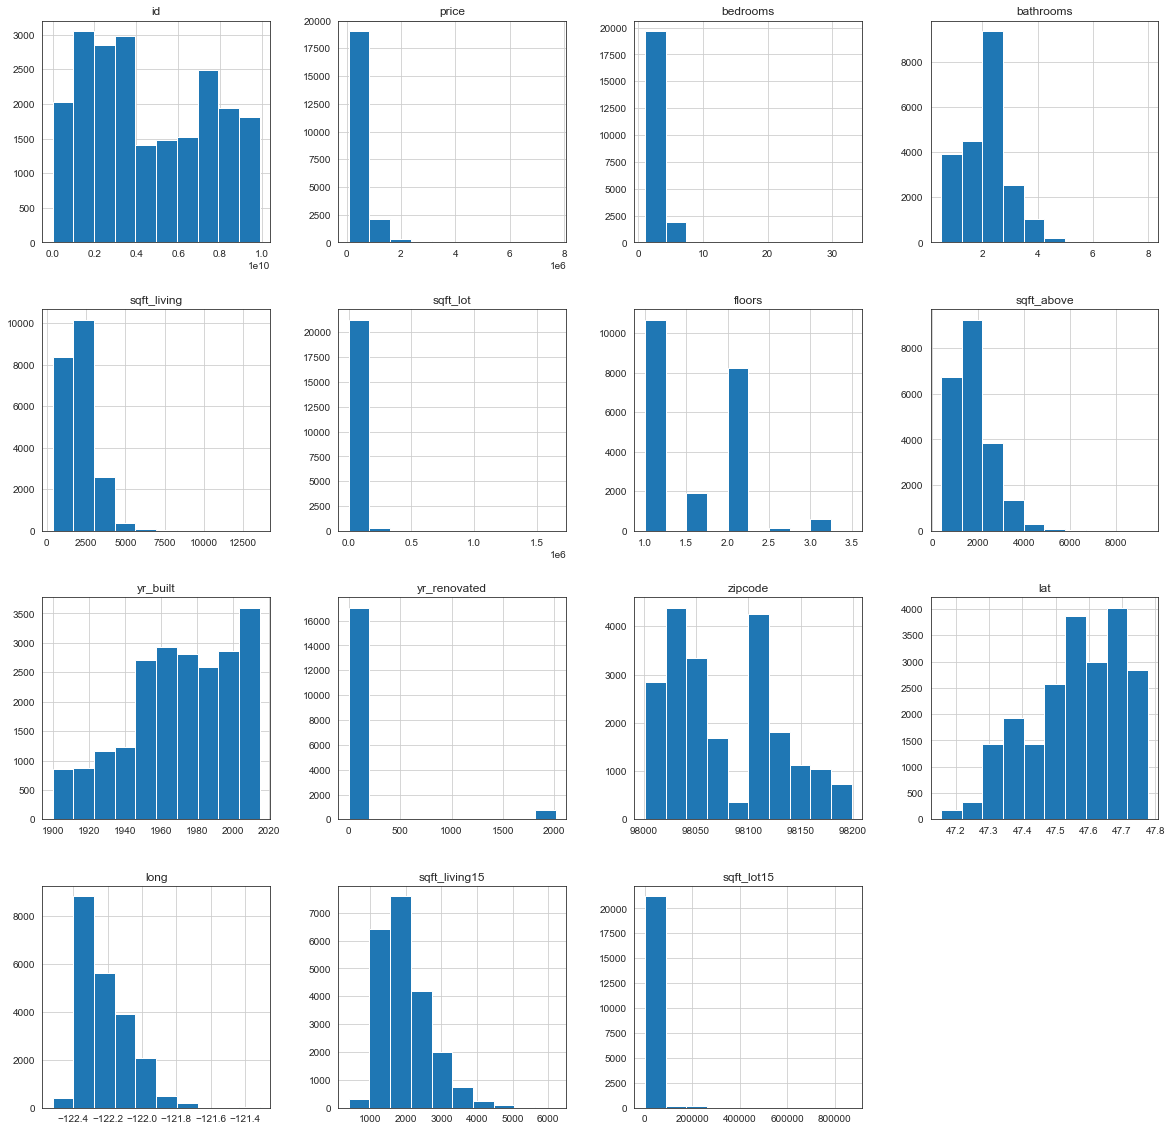

In [8]:
sns.set_style('white')

data.hist(figsize=(20,20));

# let's look at the distributions of some of these columns

# Cleaning and Preparing the Data

### Duplicates 

In [9]:
data['id'].value_counts().head()
# let's take a look to see if there are duplicates 

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

Some of these properties are listed three times, that will throw off everything unless we remove the duplicates.

In [10]:
data.drop_duplicates(subset='id', inplace=True)

# this will get rid of duplicates

### Price

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


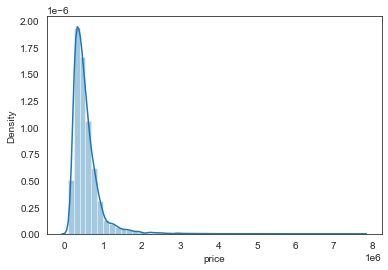

In [11]:
sns.distplot( a=data["price"]);

# this will show a histogram for the price distribution 

Observations: The distribution of price in this dataset has a very large tail in the more expensive houses, and the data is leptokurtic (taller and skinnier) than a normal distribution. 

Since this project is specifically about buying a lot of properties, I'm going to focus only on properties that are priced at 2.5 million and below, which is where a majority of the data is. This will prevent all the calculations from being dragged into more expensive price brackets for the city, and for the tenants of the new housing. 

In [12]:
data = data.loc[data['price'] < 2500000.0]

# this will get rid of all properties in the data set above 2.5 million

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

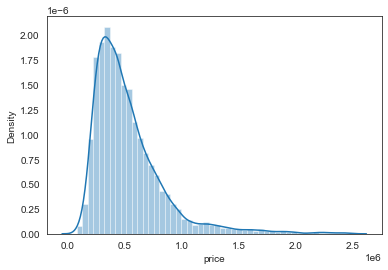

In [13]:
sns.distplot( a=data["price"])

# this will show what the distribution of prices looks like in the data 
# that remains

### Sqft_living

Square footage of living space in the home-from the data. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


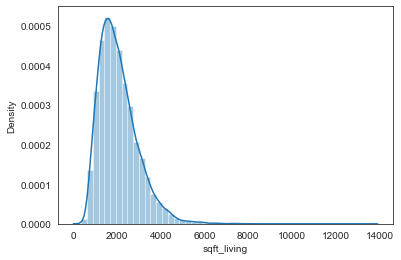

In [14]:
sns.distplot( a=data["sqft_living"]);

# Taking a look at the distribution of this variable

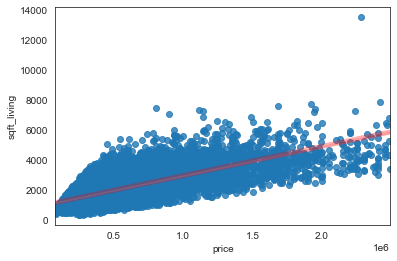

In [15]:
sns.regplot(data = data, x = 'price', y = 'sqft_living', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

# Visualizing how sqft_living affects price

I'm going to get rid of the outliers  in the data set, the homes we're looking to make into public housing will not be these outliers. 

In [16]:
data = data.loc[data['sqft_living'] < 8000]

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


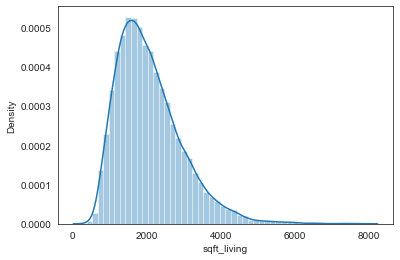

In [17]:
sns.distplot( a=data["sqft_living"]);

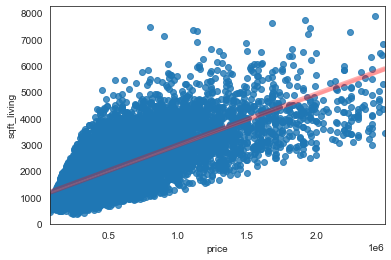

In [18]:
sns.regplot(data = data, x = 'price', y = 'sqft_living', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

### Sqft_above

Square footage of house apart from basement-from the data. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


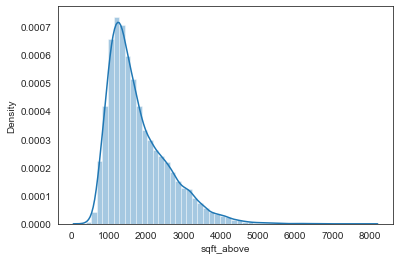

In [19]:
sns.distplot( a=data["sqft_above"]);

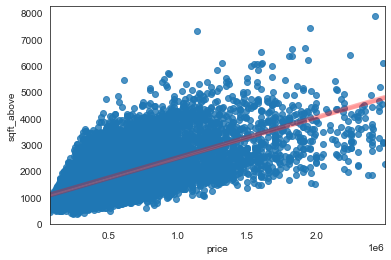

In [20]:
sns.regplot(data = data, x = 'price', y = 'sqft_above', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

### Sqft_lot

Square footage of the lot-from the data. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


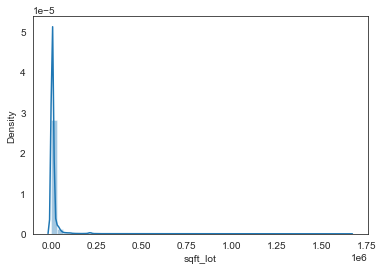

In [21]:
sns.distplot( a=data["sqft_lot"]);

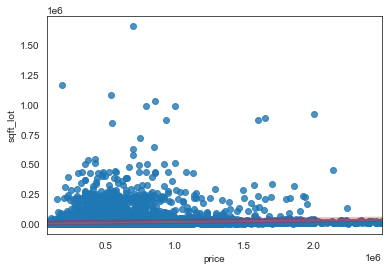

In [22]:
sns.regplot(data = data, x = 'price', y = 'sqft_lot', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

In [23]:
data['sqft_lot'].describe()

count    2.131700e+04
mean     1.508035e+04
std      4.156528e+04
min      5.200000e+02
25%      5.030000e+03
50%      7.590000e+03
75%      1.060000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [24]:
data = data.loc[data['sqft_lot'] < 100000]

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


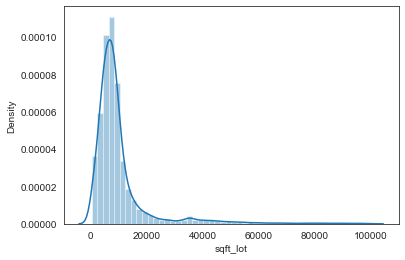

In [25]:
sns.distplot( a=data["sqft_lot"]);

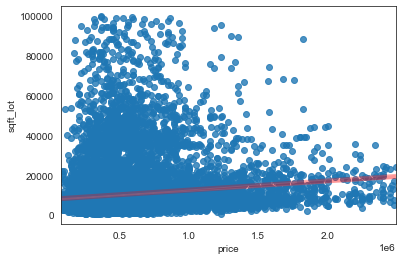

In [26]:
sns.regplot(data = data, x = 'price', y = 'sqft_lot', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

### Sqft_basement 

In [27]:
data['sqft_basement'].value_counts().head()

0.0      12374
?          437
600.0      214
500.0      204
700.0      204
Name: sqft_basement, dtype: int64

In [28]:
data['sqft_basement'].describe()

count     20855
unique      288
top         0.0
freq      12374
Name: sqft_basement, dtype: object

In [29]:
data.loc[data['sqft_basement'] == '?','sqft_basement'] = 0.0

#? doesn't make sense as a value. I will replace it with the top value instead.

In [30]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20855 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20855 non-null  int64  
 1   date           20855 non-null  object 
 2   price          20855 non-null  float64
 3   bedrooms       20855 non-null  int64  
 4   bathrooms      20855 non-null  float64
 5   sqft_living    20855 non-null  int64  
 6   sqft_lot       20855 non-null  int64  
 7   floors         20855 non-null  float64
 8   waterfront     18559 non-null  object 
 9   view           20795 non-null  object 
 10  condition      20855 non-null  object 
 11  grade          20855 non-null  object 
 12  sqft_above     20855 non-null  int64  
 13  sqft_basement  20855 non-null  object 
 14  yr_built       20855 non-null  int64  
 15  yr_renovated   17129 non-null  float64
 16  zipcode        20855 non-null  int64  
 17  lat            20855 non-null  float64
 18  long  

In [31]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

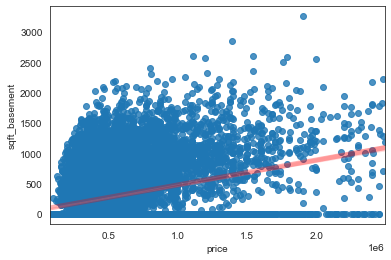

In [32]:
sns.regplot(data = data, x = 'price', y = 'sqft_basement', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

<AxesSubplot:>

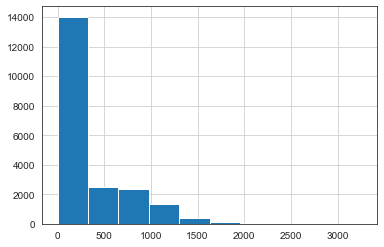

In [33]:
data['sqft_basement'].hist()

I'm going to turn this into a binary variable: 0 if the property has no basement (sqft_basement at 0,) and 1 if the property has a basement. There are too many high priced homes without a basement, and over 50% of homes don't have one. 

In [34]:
data.loc[data['sqft_basement'] != 0,'sqft_basement'] = 1

In [35]:
data['sqft_basement'].value_counts().head()

0.0    12811
1.0     8044
Name: sqft_basement, dtype: int64

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

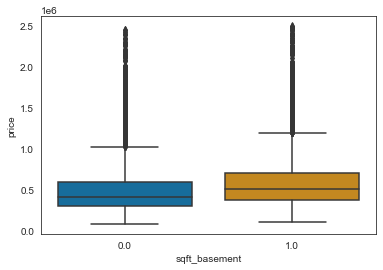

In [36]:
sns.boxplot(data = data, x="sqft_basement", y="price", palette = palette)

Observations: the minimum quartile price, average price and maximum quartile price are all higher in properties with basements, as to be expected. 

#### Square Foot Living 15 and Square Lot 15

It is noteworthy to have the square footage of the living space and the lot of the closest 15 neighbors. These following two metrics are especially interesting for our purposes. Traditional public housing, in big blocky complexes, would have much lower metrics in the following two variables than in mixed income public housing models.

#### FURTHER WORK: 
None of the properties in this data set are public housing properties. In order to properly compare how the relationships to the closest 15 neighboring properties compares for both public and non-public housing, I'd need to collect more data. 

### Sqft_living15

The square footage of interior housing living space for the nearest 15 neighbors- from the data.

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


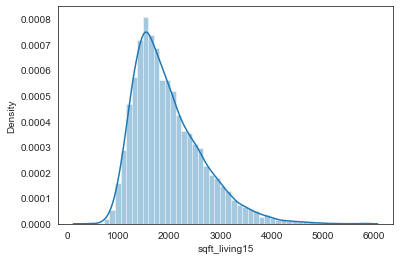

In [37]:
sns.distplot( a=data["sqft_living15"]);

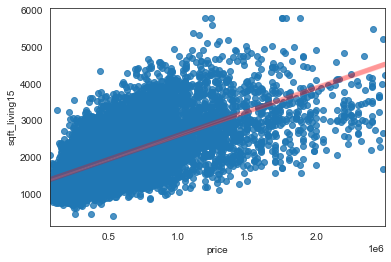

In [38]:
sns.regplot(data = data, x = 'price', y = 'sqft_living15', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

### Sqft_lot15

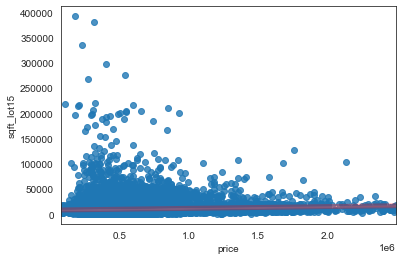

In [39]:
sns.regplot(data = data, x = 'price', y = 'sqft_lot15', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

I'm going to get rid of the upper valued outliers here, which would represent homes where the 15 closest neighbors have a *lot* of square footage. These are mansion neighborhoods and will throw off the data. I want to be conservative however with my cut off, since the goal of this project is, in part, to increase the overall prosperity of the neighbors of properties selected for public housing. 

In [40]:
data = data.loc[data['sqft_lot15'] < 400000]

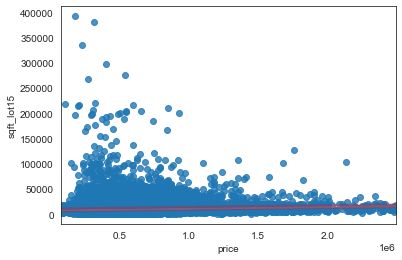

In [41]:
sns.regplot(data = data, x = 'price', y = 'sqft_lot15', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

### Waterfront

In [42]:
data['waterfront'].value_counts()

NO     18447
YES      112
Name: waterfront, dtype: int64

In [43]:
data['waterfront'].isna().sum()

2296

In [44]:
data['waterfront'].fillna(value = "NO", inplace = True)

In [45]:
data['waterfront'].replace(['NO', 'YES'],
                        [0, 1], inplace=True)
#this will make the value numeric and therefore able to be readily fed to 
#the model

Because the average value is "no", I'm choosing to fill null values with "no." Because a waterfront view would be a boon to the property, the risk involved of me falsely representing a property with a waterfront to have no waterfront, and that property being selected for public housing has a surprise positive effect for the folks who would live there. By contrast, if I filled these values with "yes" and they didn't have a waterfront, this would falsely inflate the assigned value of that property, and if those properties were selected because of that false inflated value, that would actively be unfair to the folks who lived there. 


<AxesSubplot:xlabel='waterfront', ylabel='price'>

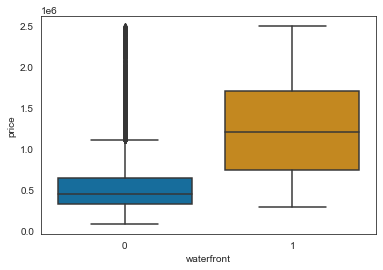

In [46]:
sns.boxplot(data = data, x = 'waterfront', y = 'price', palette = palette)

This is a clear visualization that represents: 
1) homes with a waterfront have a much wider spread for their average price, especially in the upper limits of how pricey those homes can be. But in general, waterfront homes are more expensive. 
2) there are plenty outlying examples of homes with no waterfront that are more expensive. 

### Bedrooms

<AxesSubplot:>

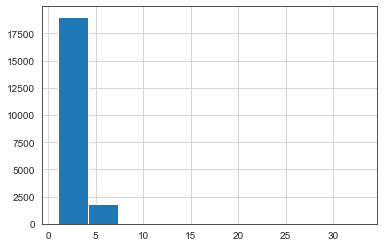

In [47]:
data['bedrooms'].hist()
# taking a look at the distribution of bedrooms in this data set

In [48]:
data['bedrooms'].value_counts()

3     9512
4     6649
2     2685
5     1517
6      248
1      186
7       35
8       12
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Since properties where there are more than 9 bedrooms may be difficult to convert into public housing anyway, and because most of the data is outside these values, I'll be dropping properties that have more than 9 bedrooms.

In [52]:
data = data.loc[data['bedrooms'] <= 9]

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

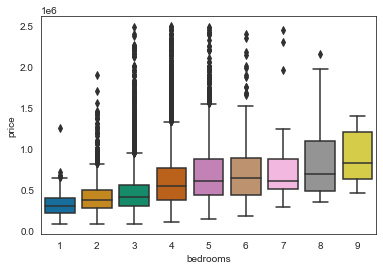

In [53]:
sns.boxplot(data = data, x="bedrooms", y="price", palette = palette)
# we can see from the figure that as bedrooms increase, price consistently 
# increases, and also we can get a better sense for the distribution of price
# outliers by bedroom. 

This plot shows 1) that homes show a steady increase in minimum price as bedrooms increase 2) that there are very many outliers in homes that have 1-7 bedrooms in price but even with those outliers, there is also a steady increase in maximum price as bedrooms increase as well.

# Transforming Categorical Data

### Condition

CITATION: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#c

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5 = Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

Based on the description as given by the data set, this is a good candidate to be made into continuous data. A house in "very good" condition could get a lower condition score in the future if the property doesn't receive proper maintenance. Likewise a property in "fair" condition could be renovated and made into a property with a higher condition.

Based on the description as given by the data set, this is a good candidate to be made into continuous data. A house in "very good" condition could get a lower condition score in the future if the property doesn't receive proper maintenance. Likewise a property in "fair" condition could be renovated and made into a property with a higher condition.

In [54]:
data['condition'].replace(['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                        [0, 1, 2, 3, 4], inplace=True)

# making these values continuous 

In [55]:
data['condition'].value_counts()

# looking at the spread of the data

2    13519
3     5502
4     1653
1      149
0       27
Name: condition, dtype: int64

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='condition'>

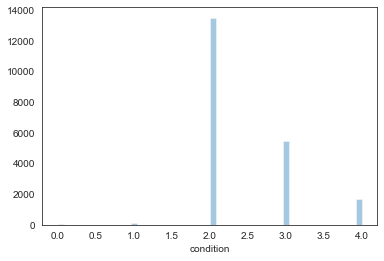

In [56]:
sns.distplot( a=data["condition"], hist=True, kde=False, rug=False )

# visualizing the spread of the data

Observations: there is relatively no representation of homes with a condition below "fair" in this dataset. A majority of homes are in fair condition, with less in "good" condition and even less in "very good" condition.

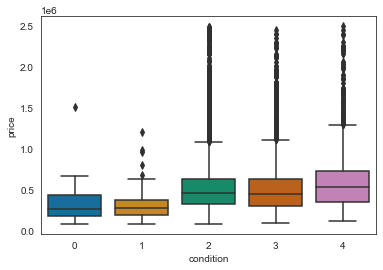

In [57]:
sns.boxplot(data = data, x = 'condition', y = 'price', palette = palette)
plt.show();

Observations: The price of homes in poor condition and fair condition on average have a lower price than homes in better condition. The minimum price for a home goes up as it's condition increases in value, as well as the upper limit price for a home.

### Grade

CITATION: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#c

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [58]:
data['grade'].value_counts()

7 Average        8762
8 Good           5928
9 Better         2505
6 Low Average    1967
10 Very Good     1046
11 Excellent      328
5 Fair            227
12 Luxury          54
4 Low              27
13 Mansion          5
3 Poor              1
Name: grade, dtype: int64

In [59]:
data['grade'].replace(['3 Poor', '4 Low', '5 Fair', '6 Low Average', 
                       '7 Average', '8 Good', '9 Better', '10 Very Good',
                       '11 Excellent', '12 Luxury', '13 Mansion'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

In [60]:
data['grade'].value_counts()

4     8762
5     5928
6     2505
3     1967
7     1046
8      328
2      227
9       54
1       27
10       5
0        1
Name: grade, dtype: int64

For our purposes, it doesn't make sense to keep any Luxury or Mansion properties in the data set, since those kinds of properties would need to be renovated just to make better use of the space, and would effectively be making these properties less valuable. It also doesn't make sense to keep the single property in the poor grade, we can assume that property will be on the list, and take it out of the data for now. So I'm going to drop those rows.

Likewise it doesn't make sense to keep homes in this data set that are below a 3, because these homes would need essential building done, such as installing electricity and water. While we are looking to do renovations on properties, we must draw a distinction between building and renovating. Therefore I'll be dropping properties at a 3 or below.

#### FURTHER WORK:
I would like to come back to this variable in future works and do further investigation. Homes currently at a grade of 6 or above meet building codes that are currently in place. It may be beneficial to come back and raise the minimum grade of homes in this data set to 6, to lower the cost of renovations needed to make these properties into public housing. All homes not currently up to code would need to be brought up to code in renovations, should they be selected for the Section 8 Expansion project.

In [61]:
poor = data.loc[data['grade'] == 0]

# labeling this single property for the city to buy, buldoze and maybe 
# make into a small public park

In [62]:
data = data.loc[data['grade'] < 9]
data = data.loc[data['grade'] >= 3]

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


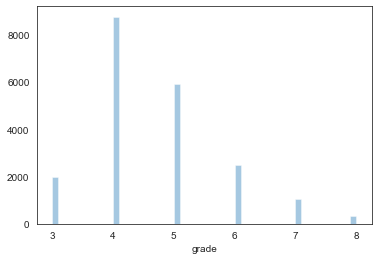

In [63]:
sns.distplot( a=data["grade"], hist=True, kde=False, rug=False);

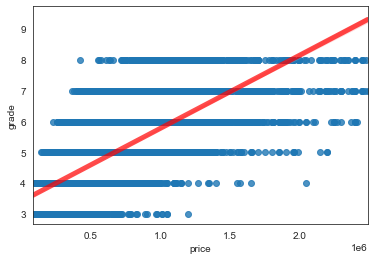

In [64]:
sns.regplot(data = data, x = 'price', y = 'grade', 
            line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Observations: As grade improves, so does price, this is what we'd expect to see.

### View

FROM THE DATASET: Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other. Represents quality of view from house.

Since most properties have "none" listed as the view, and this category is subjective to start with, I am going to convert it to a binary column. Homes with "good" or "excellent" views will have a value of 1, all other homes will have a value of 0 for this column.

In [65]:
data['view'].value_counts()

NONE         18569
AVERAGE        883
GOOD           455
FAIR           316
EXCELLENT      253
Name: view, dtype: int64

In [66]:
data['view'].replace(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                        [0, 0, 0, 1, 1], inplace=True)

# replacing the values to binary values

In [67]:
data['view'].fillna(value=0,inplace=True)

# filling in n/a values with 0

In [68]:
data['view'].value_counts()

# taking a look at the distribution now 

0.0    19828
1.0      708
Name: view, dtype: int64

<AxesSubplot:>

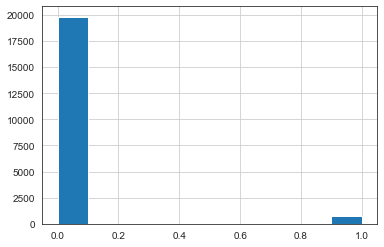

In [69]:
data['view'].hist()

# it's easier to see visually 

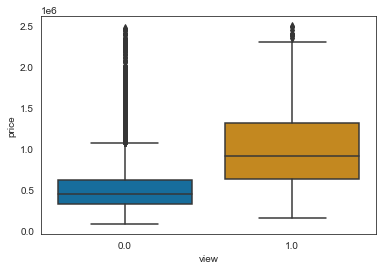

In [70]:
sns.boxplot(data = data, x = 'view', y = 'price', palette = palette)
plt.show();

Observations: We can see here that having a view has a clear increase in the value of the home, and there is a much larger spread in homes with a view as to their price. Likewise, we can see that homes without a view are generally less expensive than homes with a view but there are very many outlying cases where that isn't true.

In [71]:
data.isna().sum()

#making sure there are no remaining columns with missing values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3658
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Year Renovated

Because we will be renovating each property selected for this pilot program, it's important to understand the effects renovating a property will have on it's value. 

<AxesSubplot:>

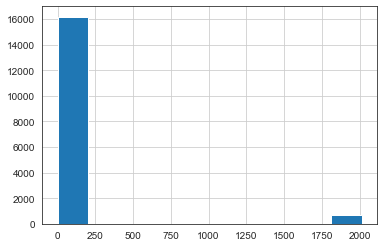

In [72]:
data['yr_renovated'].hist()
# taking a look at the distributions of homes renovated vs unrenovated

This plot doesn't tell us much except that the majority of homes in this data set have never been renovated. 

In [73]:
data['yr_renovated'].mean()

82.43672236046925

In [74]:
data['yr_renovated'].isna().sum()/data.shape[0]

# 17% of the data in this column is missing, and in this column

0.17812621737436696

In [75]:
data['yr_renovated'].fillna(value = 0, inplace = True)

I'm filling the NA values with 0, as the vast majority of homes have never been renovated in this dataset. 

# Analyzing Property Timelines

Because I'm now finished cleaning and preparing the data, I can start analyzing what data exists. 

## Comparing Renovated Homes with Unrenovated Homes 

In [76]:
# the mean price for a home not renovated in this data set is 5.325143e+05

no_reno = data.loc[data['yr_renovated'] == 0]
no_reno_stats = no_reno.mean()
no_reno_stats

id               4.648427e+09
price            5.178077e+05
bedrooms         3.373759e+00
bathrooms        2.102563e+00
sqft_living      2.047173e+03
sqft_lot         1.018782e+04
floors           1.496295e+00
waterfront       4.082867e-03
view             3.165482e-02
condition        2.419174e+00
grade            4.651394e+00
sqft_above       1.762171e+03
sqft_basement    3.855537e-01
yr_built         1.972364e+03
yr_renovated     0.000000e+00
zipcode          9.807812e+04
lat              4.756143e+01
long            -1.222163e+02
sqft_living15    1.972658e+03
sqft_lot15       9.898066e+03
dtype: float64

In [77]:
yes_reno = data.loc[data['yr_renovated'] != 0].copy()
yes_reno_stats = yes_reno.mean()
yes_reno_stats

id               4.514145e+09
price            7.200811e+05
bedrooms         3.440459e+00
bathrooms        2.268651e+00
sqft_living      2.248066e+03
sqft_lot         1.052812e+04
floors           1.502869e+00
waterfront       3.299857e-02
view             1.147776e-01
condition        2.216643e+00
grade            4.714491e+00
sqft_above       1.816657e+03
sqft_basement    5.007174e-01
yr_built         1.939235e+03
yr_renovated     1.996222e+03
zipcode          9.809764e+04
lat              4.758326e+01
long            -1.222680e+02
sqft_living15    1.947396e+03
sqft_lot15       9.874834e+03
dtype: float64

#### FURTHER WORK: 
I'd like to come back to these statistics and do a much further analysis on the differences between the average renovated home vs non-renovated home on other variables besides price. IE does the average renovated home have larger living space or neighbors with more living space than non-renovated counterparts. But for now I will only be comparing the prices. 

I'd also like to come back to the data and isolate non-renovated homes that have gone up in the last 10 years from all other non-renovated homes and compare the three groups. However, in my initial research, I have only had the resources to do a brief inspection of renovated VS non-renovated. 

In [78]:
reno_differences = yes_reno_stats - no_reno_stats
reno_difference = reno_differences['price']
reno_difference

202273.36808995338

Of note: this is the exact calculated difference in average price between homes that have been renovated vs. homes that have not been renovated, in the data as it's been so far cleaned and prepared. While this statistic has not been scaled by amount, such as bedrooms or living space for example, this statistic does indicate indeed that homes that were renovated in this data set where $201,941 more valuable on average.

In [79]:
average_yes_reno_price = yes_reno_stats['price']
average_yes_reno_price

720081.1162123386

In [80]:
budget = 100000000
baseline_yes_reno = budget / average_yes_reno_price
baseline_yes_reno

138.87324323404678

The average non renovated home in the remaining data after cleaning and preparation, is priced at $719,794. If we were to hypothetically spend our entire budget on the average renovated home, we'd be able to buy 138 properties without going over budget. 

In [81]:
average_no_reno_price = no_reno_stats['price']
average_no_reno_price

517807.7481223852

In [82]:
baseline_no_reno = budget / average_no_reno_price
baseline_no_reno

193.12186880673084

In [83]:
baseline_no_reno - baseline_yes_reno

54.24862557268406

The average non renovated home in the remaining data after cleaning and preparation, is priced at $517,853. That may sound pretty close to an average renovated home but it fits into the laid out budget for the project about 193 times. 

For clarity, if we were only buying average priced non-renovated homes, we'd be able to buy 54 more homes than if we were only buying average priced non renovated homes. 

To properly compare visually, I will take each home that has been renovated, and subtract the average price of a non-renovated home from the sale price, this will recenter the visualization's bars to show how above or below each property was compared to the average un-renovated home. 

In [84]:
# make a function where the input is each price for each property that has 
# been renovated and the output is that price minus the average price for a non 
# renovated home

def find_price_adjusted(price):
    price = price - average_no_reno_price
    return price

yes_reno['price'] = yes_reno['price'].map(find_price_adjusted)

To organize the data, and get a sense of timeline, I'm going to be putting these properties into chronological bins. Every 5 years will show very basic changes by half-decade. 


#### FURTHER WORK:
I'd like to come back to this visualization with more time and resources, and make the bins every four years, in correlation with the mayoral history of Seattle. 

In [85]:
# aggregating the data by half-decade

bins = [ 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 
        1990, 1995, 2000, 2005, 2010, 2015] 

labels = ['1940', '1945', '1950', '1955', '1960', '1965', '1970', '1975', '1980', 
          '1985', '1990', '1995', '2000', '2005', '2010', '2015']

cut_data, bin_edges = pd.cut(yes_reno['yr_renovated'], bins = bins,
                              labels = labels, retbins = True)
bin_edges

array([1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985,
       1990, 1995, 2000, 2005, 2010, 2015])

In [86]:
yes_reno.head()

#taking a look to make sure aggrigation worked correctly

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,20192.251878,3,2.25,2570,7242,2.0,0,0.0,...,4,2170,1.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,6/13/2014,178192.251878,3,2.50,2300,3060,1.5,0,0.0,...,5,1510,1.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
95,1483300570,9/8/2014,387192.251878,4,2.50,3300,10250,1.0,0,0.0,...,4,2390,1.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
103,2450000295,10/7/2014,572192.251878,3,2.50,2920,8113,2.0,0,0.0,...,5,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113
125,4389200955,3/2/2015,932192.251878,4,2.75,2750,17789,1.5,0,0.0,...,5,1980,1.0,1914,1992.0,98004,47.6141,-122.212,3060,11275


In [87]:
yes_reno['yr_renovated'] = cut_data

# replacing the yr_renovated with the binned data

Since I have homes grouped by 5 year bins, it's important that for each bin I get an average price instead of a sum value of all the properties in that bin, since I have different numbers of properties in each bin. Getting the average price per bin will show something comparable. 

In [88]:
# making sure I get the average per bin, and resetting the index for clarity

yes_reno_averages = yes_reno.groupby(by='yr_renovated').mean()
yes_reno_averages = yes_reno_averages.reset_index()
yes_reno_averages

,yr_renovated,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1940,1.451350e+09,-139407.748122,2.000000,1.000000,1150.000000,4470.000000,1.000000,0.000000,0.000000,2.500000,3.500000,950.000000,0.500000,1915.000000,98115.500000,47.627800,-122.360000,1295.000000,5500.000000
1,1945,4.448326e+09,-88557.748122,2.750000,1.687500,1607.500000,5750.000000,1.250000,0.000000,0.000000,2.500000,3.250000,1515.000000,0.250000,1912.500000,98123.000000,47.619675,-122.338250,1657.500000,6433.000000
2,1950,3.606523e+09,-146841.081456,1.333333,1.166667,963.333333,4399.333333,1.166667,0.000000,0.000000,2.666667,3.666667,963.333333,0.000000,1912.000000,98087.000000,47.472133,-122.240333,1323.333333,4694.333333
3,1955,4.577260e+09,-59474.414789,3.166667,1.458333,1586.666667,19070.833333,1.000000,0.000000,0.000000,2.333333,3.500000,1345.000000,0.333333,1920.666667,98103.000000,47.621567,-122.232833,1213.333333,8650.833333
4,1960,5.478101e+09,17870.251878,3.100000,1.500000,1814.500000,9129.700000,1.300000,0.100000,0.100000,2.700000,3.800000,1580.500000,0.200000,1923.200000,98095.500000,47.626950,-122.296900,1910.000000,8433.000000
5,1965,3.869926e+09,81296.098031,3.846154,2.038462,2057.692308,9422.538462,1.461538,0.153846,0.230769,2.692308,3.923077,1802.307692,0.384615,1929.153846,98097.769231,47.558385,-122.250923,1703.846154,8209.000000
6,1970,4.685418e+09,-26341.081456,3.380952,1.904762,1993.809524,9223.857143,1.309524,0.000000,0.000000,2.571429,4.047619,1540.952381,0.523810,1929.142857,98119.714286,47.599490,-122.319238,1831.428571,9187.380952
7,1975,5.433291e+09,-58104.081456,2.933333,1.683333,1822.666667,14671.600000,1.400000,0.000000,0.000000,2.400000,3.866667,1658.000000,0.266667,1927.400000,98092.066667,47.564353,-122.241933,1648.666667,11885.800000
8,1980,4.851001e+09,147021.797332,2.909091,1.931818,1958.181818,10130.000000,1.636364,0.045455,0.181818,2.545455,4.681818,1695.909091,0.454545,1929.545455,98087.909091,47.578818,-122.260545,2052.727273,9952.500000
9,1985,4.466804e+09,90343.251878,3.320755,2.037736,2063.584906,13085.981132,1.500000,0.056604,0.113208,2.433962,4.339623,1768.113208,0.396226,1937.792453,98089.188679,47.568042,-122.249755,1985.094340,12363.226415


## Visualizing the Comparison 

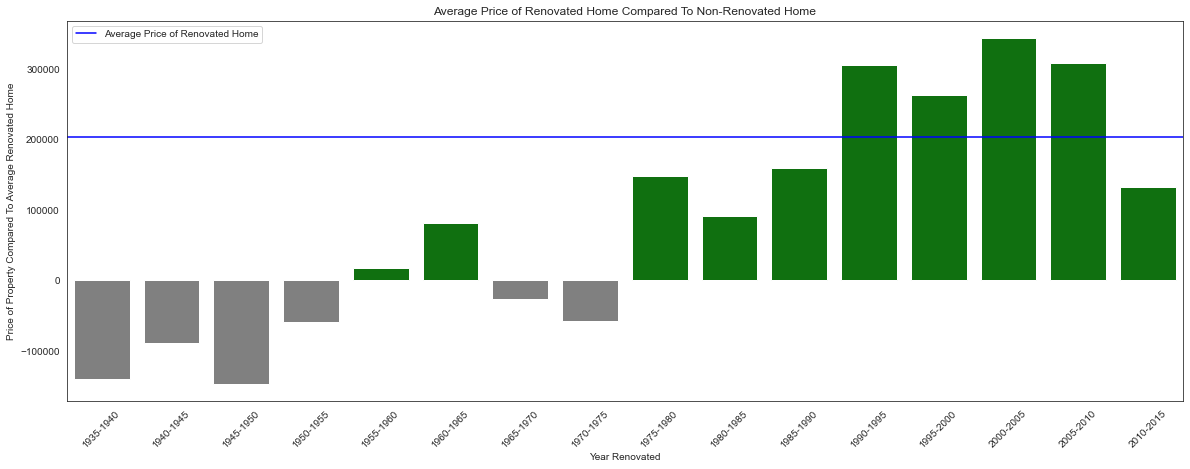

In [89]:
# color coding the bars to be green if the average price of home in that bin
# is higher than the average non-renovated home, and grey if below, to help
# visual intuition 

values = yes_reno_averages['price'] 
colors = ['grey' if (val < 0) else 'green' for val in values]

# making the graph
plt.figure(figsize = (20,7))
ax = sns.barplot(data = yes_reno_averages, x = 'yr_renovated', 
                 y ='price', palette = colors)

# making the labels for the bins 
ax.set_xticklabels(['1935-1940', '1940-1945', '1945-1950', '1950-1955', 
                      '1955-1960', '1960-1965', '1965-1970', '1970-1975',
                     '1975-1980', '1980-1985', '1985-1990', '1990-1995',
                     '1995-2000', '2000-2005', '2005-2010', '2010-2015'])

# rotating my labels
plt.xticks(rotation=45);

# making the blue line where the average price for renovated home is with legend
plt.axhline(reno_difference, color = 'blue', label = "Average Price of Renovated Home")
plt.legend()

# making the labels and titles for the axes
ax.set(xlabel = 'Year Renovated', 
                 ylabel = 'Price of Property Compared To Average Renovated Home', 
                 title = "Average Price of Renovated Home Compared To Non-Renovated Home");

#### KEY

#### X axis = average price of non-renovated home
#### Green Bar = above average price of non-renovated home
#### Blue Line = average price of renovated home

This plot's 0 on the Y axis has been adjusted so that everything above are properties where their price (grouped by every 5 years,) is above the average price for a non-renovated property. The blue line represents the average price of properties that have been renovated. Properties above the blue line represent renovated properties that are valued above the average renovated property.

#### Observations: 
1) all properties renovated after 1975 are more valuable than the average renovated property. 

2) properties renovated in the years between 1990 to 2010, are averaging as a higher price compared even to other renovated properties. 

#### Inferences: 

Renovating properties increases their value, that's to be expected. However, we now can now infer that if we renovate properties that have already been renovated but their renovation happened before 1975, we can "flip" those properties into having a higher value. 

## Home History

### Age of Home

In [90]:
def age_of_home(year_built):
    age = 2014 - year_built
    return age

data['age_of_home'] = data['yr_built'].map(age_of_home)

# showing the age of the home rather than the year it was built, to explore
# a different perspective on the data

In [91]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_of_home
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,2170,1.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,81
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,27


<AxesSubplot:>

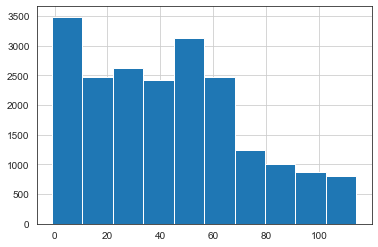

In [92]:
data['age_of_home'].hist()

# seeing the distributions of how old the home is

### Year Modified 

I'm going to make a new column for year modified. This column will either list the amount of years since last renovation or the date of construction, whichever one happened most recently. This column helps liken newer non-renovated homes with recently renovated homes, and older non-renovated homes with homes that were renovated a while ago. 

In [93]:
data['yr_mod'] = data[['yr_built','yr_renovated']].max(axis=1)

# this will select the most recent value between either year built or year renovated

In [94]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_of_home,yr_mod
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,59,1955.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,1.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,63,1991.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,81,1933.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,49,1965.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,27,1987.0


In [95]:
data['yr_mod'].value_counts().head()

2014.0    626
2005.0    465
2006.0    452
2003.0    440
2004.0    435
Name: yr_mod, dtype: int64

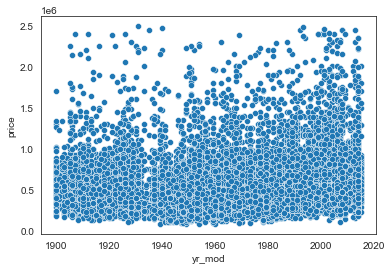

In [96]:
sns.scatterplot(data = data, x = 'yr_mod', y = 'price')
plt.show()

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_mod'>

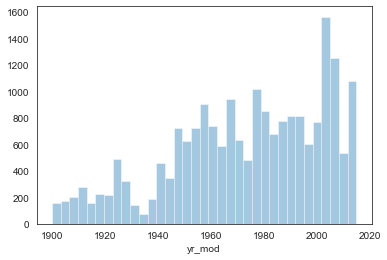

In [97]:
sns.distplot( a=data["yr_mod"], hist=True, kde=False, rug=False )

# Distance Data

Now that I have limited the amount of properties I'll be looking up additional information for, it's time to gather some more data. 

Using Google's Geocoding api and scraping with Selenium to measure distances away from downtown, police stations, hospitals and schools. 

#### ASSUMPTIONS: 
I have not had the resources yet to cross reference if the infrastructure points of interest have changed since 2015. I'm assuming in this data that the locations of Hospitals, Police Stations and Schools in 2022 is the same as it was in 2015. 

#### FURTHER WORK: 
I'd also like to include data about firehouses, which I have a source for, located in "Data" but didn't have the resources to currently explore. As the scope of this project increases, I'd like to include distances away from public parks, libraries, colleges and universities, and public transportation. 

I'd also like to do more research about the history of these infrastructure points to counteract the assumptions stated previously. 

## Getting Infrastucture Data

In [98]:
# for the api

with open('.secrets/google.json') as f:
    creds = json.load(f)

Making a function that intakes a list of addresses and outputs a list of tuples, each tuple containing the coordinates for that address using google's API. 

In [99]:
# making an empty dictionary to contain the address as the key and a tuple
# of latitude and logitude as the values. 

def get_coordinates(addresses):
    for address in addresses:

        google_query = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={creds['key']}"

        results = requests.get(google_query)
        results_json = results.json()
        lat = results_json['results'][0]['geometry']['location']['lat']
        long = results_json['results'][0]['geometry']['location']['lng']

        coordinates[f"{address}"]=(lat, long)

### Downtown 

In [100]:
downtown = (47.6050, -122.3344)

Making a function that intakes the dataframe, and a specific location, as  a touple of coordinates and dds a new row to the DF, column name as the pair of coordinates for that location, this column lists the distance each property is away from that location:

### Hospitals

#### CITATION 

https://data-seattlecitygis.opendata.arcgis.com/datasets/hospitals/explore?showTable=true

In [101]:
# loading the data

hospital_data = pd.read_csv('Data/Hospitals.csv')

In [102]:
hospital_data.head()

# taking a look at the data in this csv

,X,Y,OBJECTID,FACILITY,ADDRESS,SE_ANNO_CAD_DATA,CITY,ACUTE_CARE,GIS_EDT_DT,URL,TELEPHONE
0,-122.336888,47.714248,1,UW Medical Center - Northwest,1550 N 115th ST,NaN,"Seattle, WA, 98133-8401",Y,2020/03/17 00:00:00+00,https://www.uwmedicine.org/locations/northwest...,877-694-4677
1,-122.379555,47.667365,2,Swedish Medical Center - Ballard Campus,5300 Tallman Ave NW,NaN,"Seattle, WA 98107",Y,2020/03/17 00:00:00+00,https://www.swedish.org/locations/ballard-campus,206-782-2700
2,-122.341419,47.457800,3,Highline Medical Center,16251 Sylvester Rd SW,NaN,"Burien, WA, 98166-3017",Y,2020/03/17 00:00:00+00,https://www.chifranciscan.org/highline-medical...,206-244-9970
3,-122.214121,47.442273,4,Valley Medical Center,400 S 43rd St,NaN,"Renton, WA, 98055-5714",Y,2020/03/17 00:00:00+00,https://www.uwmedicine.org/locations/valley-me...,425-690-1000
4,-122.327279,47.292612,5,St. Francis Hospital,34515 9th Ave S,NaN,"Federal Way, WA, 98003-6761",Y,2020/03/17 00:00:00+00,https://www.chifranciscan.org/st-francis-hospi...,253-835-8100


In [103]:
hospital_addresses = hospital_data['ADDRESS'] + hospital_data['CITY']

# getting proper addresses for the Google API

In [104]:
hospital_addresses.head()

# seeing the addresses

0         1550 N 115th STSeattle, WA, 98133-8401
1           5300 Tallman Ave NWSeattle, WA 98107
2    16251 Sylvester Rd SWBurien, WA, 98166-3017
3            400 S 43rd StRenton, WA, 98055-5714
4     34515 9th Ave SFederal Way, WA, 98003-6761
dtype: object

In [105]:
hospital_names = hospital_data['FACILITY']

# making a list of hospital names for later

### Police Stations

#### CITATION 

http://www.seattle.gov/police/about-us/police-locations

In [106]:
# I didn't bother to scrape for police data, there are only 5 stations
# scraping would be more work than hardcoding at this point

police_stations = {'north_ps' : "10049 College Way N. Seattle, WA 98133",
'west_ps' : "810 Virginia Street, Seattle, WA 98101",
'east_ps' : "1519 12th Avenue Seattle, WA 98122",
'south_ps' : "3001 S. Myrtle Seattle, WA 98108",
'southwest_ps' : "2300 S.W. Webster Seattle, WA 98106"}

ps_addresses = police_stations.values()
ps_names = police_stations.keys()

### Schools

For the purposes of this project, I'm only including public school data K-12. 

#### Scraping for School Data 

In [107]:
# first telling selenium where the webdriver is on my local machine
driver = webdriver.Chrome('/Users/b0ihazard/Desktop/chromedriver')

# telling selenium where the url is that I want to scrape from and to bring 
# that up
school_url = "https://www.seattleschools.org/schools/"
go_article = driver.get(school_url)

# making a list of school names and addresses as selenium objects
grab_school_names = driver.find_elements(By.CSS_SELECTOR, "h4.list-item-title")
grab_school_addresses = driver.find_elements(By.CSS_SELECTOR, "address")

# making corrasponding lists of addresses and names for text strings 
school_addresses = []
school_names = []

# reformatting each raw address to a string and putting it on the address list
for raw_address in grab_school_addresses:
    address = raw_address.text.split("Main Office")[0]
    school_addresses.append(address)

# reformatting each raw name to a string and putting it on the name list
for raw_name in grab_school_names:
    school_name = raw_name.text
    school_names.append(school_name)

# closing the webdriver after use
driver.close()

In [108]:
# taking a look at each school just to makesure formatting worked

number = 0

for address in school_addresses:
    number = number + 1
    print(number, address)

1 6110 28th Ave. NW
Seattle, WA 98107

2 3928 S Graham St.
Seattle, WA 98118

3 8601 Rainier Ave. S
Seattle, WA 98118

4 3010 59th Ave. SW
Seattle, WA 98116

5 3701 SW 104th St.
Seattle, WA 98146

6 1301 E Yesler Way
Seattle, WA 98122

7 1418 NW 65th St.
Seattle, WA 98117

8 2025 14th Ave. S
Seattle, WA 98144

9 3921 Linden Ave. N
Seattle, WA 98103

10 13052 Greenwood Ave. N
Seattle, WA 98133

11 3311 NE 60th St.
Seattle, WA 98115

12 520 NE Ravenna Blvd.
Seattle, WA 98115

13 1700 N 90th St.
Seattle, WA 98103

14 2550 34th Ave. W
Seattle, WA 98199

15 3737 NE 135th St.
Seattle, WA 98125

16 2600 SW Thistle St.
Seattle, WA 98126

17 5511 15th Ave. S
Seattle, WA 98108

18 2424 7th Ave. W
Seattle, WA 98119

19 723 S. Concord St.
Seattle, WA 98108

20 7821 Stone Ave. N
Seattle, WA 98103

21 2820 S Orcas St.
Seattle, WA 98108

22 7711 43rd Ave. NE
Seattle, WA 98115

23 2601 SW Kenyon St.
Seattle, WA 98126

24 4525 S Cloverdale St.
Seattle, WA 98118

25 3003 NE 75th St.
Seattle, WA 98115

2

In [109]:
school_addresses.remove(school_addresses[65])

This isn't an address so we must remove it from the data, but I have to remember to take the accompanying name, Middle College from the list as well. 

In [110]:
school_names[65]

'Middle College'

In [111]:
school_names.remove('Middle College')

## Finding Distance for Infrastructure 

Getting a dictionary of coordinates based on the collected addresses for Hospitals, Police Stations, Schools

In [112]:
coordinates ={}

In [113]:
get_coordinates(hospital_addresses)

In [114]:
get_coordinates(ps_addresses)

In [115]:
get_coordinates(school_addresses)

In [116]:
coordinates['downtown'] = downtown

Getting a list of all the names of these points of interests for the column names. 

In [117]:
all_names = []

for hospital in hospital_names:
    all_names.append(hospital)
for ps_name in ps_names:
    all_names.append(ps_name)
for school_name in school_names:
    all_names.append(school_name)


In [118]:
all_names.append('downtown')

In [119]:
len(all_names) == len(coordinates)

# to make sure that each name has a set of coordinates and vice versa

True

In [120]:
counter = 0
columns = {}
for name in all_names:
    columns[name] = counter
    counter +=1
    
# making a dictionary of column names with an index for referencing later

Making a function that will calculate how far away each point of interest is by making each point of interest a column, and making the rows how far away that point of interest is from each property. Each column should be labeled properly by name. 

In [121]:
# intake: dataframe, location as a touple of coordinates, list of names
# output: column on dataframe that measures distance from location with column name

def distance_from (data, coordinates, all_names):
    counter = 0
    for coordinate_value in coordinates.values():
        distance_from_coordinates = []
        col_name = all_names[counter]
        for x in data.index:
            property_coordinates = (data.loc[x]['lat'], data.loc[x]['long'])
            dist = distance.distance(property_coordinates, coordinate_value).miles
            distance_from_coordinates.append(dist)
        data[col_name] = distance_from_coordinates
        counter += 1
        
#     return f"added distance from {coordinate}, {col_name} to each row"

In [122]:
distance_from(data, coordinates, all_names)

# implimenting this function on all of our data does take some time, as a note

#### Finding the closest possible Hospital, Police Station and School for each property. 

#### FURTHER WORK: 
This is now a much larger amount of information, I've added over 150 columns to the original dataset. In further work, I would like to isolate each point of interest, to be able to compare how individual points of interest affect property values when compared to other individual points of interest. However, given the parameters of my work so far, I must simplify this data significantly. Therefore, I'll be reducing these 150 columns into only three columns, to show the closest possible hospital, police station and school. This will avoid the multicoliniarity problem with having too much coordinate data as well. 

In [123]:
hospitals = hospital_names

In [124]:
# making a dataframe just for the hospital information for further work
# the last columns in this dataframe will default to the distance to the closest hospital 

data_h = data[hospitals]
data_h.head()
data_h['closest_hospital_distance'] = data[['UW Medical Center - Northwest',
 'Swedish Medical Center - Ballard Campus',
 'Highline Medical Center',
 'Valley Medical Center',
 'St. Francis Hospital',
 'Snoqualmie Valley Hospital',
 'Swedish Medical Center - First Hill',
 'MultiCare  Auburn Medical Center',
 'Overlake Hospital Medical Center',
 "Seattle Children's Hospital",
 'Virginia Mason Medical Center',
 'EvergreenHealth - Kirkland',
 'Swedish Medical Center - Cherry Hill',
 'Seattle VA Medical Center',
 'Swedish Medical Center - Issaquah Campus',
 'Kaiser Permanente Capitol Hill Campus',
 'St. Elizabeth Hospital',
 'Harborview Medical Center',
 'University of Washington Medical Center']].min(axis=1)

<ipython-input-124-b04b706e5bbc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_h['closest_hospital_distance'] = data[['UW Medical Center - Northwest',


In [125]:
# making a dataframe just for school information for future work
# the last columns in this dataframe will default to the distance to the closest school 

data_s = data[school_names]
data_s['closest_school_distance'] = data[['Adams Elementary',
 'Aki Kurose Middle School',
 'Alan T. Sugiyama High School',
 'Alki Elementary',
 'Arbor Heights Elementary',
 'Bailey Gatzert Elementary',
 'Ballard High School',
 'Beacon Hill International Elementary',
 'Benjamin Franklin Day Elementary',
 'Broadview-Thomson K-8',
 'Bryant Elementary',
 'Cascade Parent Partnership Program',
 'Cascadia Elementary',
 'Catharine Blaine K-8',
 'Cedar Park Elementary',
 'Chief Sealth International High School',
 'Cleveland High School',
 'Coe Elementary',
 'Concord International Elementary',
 'Daniel Bagley Elementary',
 'Dearborn Park International Elementary',
 'Decatur Elementary',
 'Denny International Middle School',
 'Dunlap Elementary',
 'Eckstein Middle School',
 'Emerson Elementary',
 'Fairmount Park Elementary',
 'Franklin High School',
 'Garfield High School',
 'Gatewood Elementary',
 'Genesee Hill Elementary',
 'Graham Hill Elementary',
 'Green Lake Elementary',
 'Greenwood Elementary',
 'Hamilton International Middle School',
 'Hawthorne Elementary',
 'Hazel Wolf K-8',
 'Highland Park Elementary',
 'Ingraham High School',
 'Interagency Academy',
 'Jane Addams Middle School',
 'John Hay Elementary',
 'John Muir Elementary',
 'John Rogers Elementary',
 'John Stanford International Elementary',
 'Kimball Elementary',
 'Lafayette Elementary',
 'Laurelhurst Elementary',
 'Lawton Elementary',
 'Leschi Elementary',
 'Licton Springs K-8',
 'Lincoln High School',
 'Louisa Boren K-8',
 'Lowell Elementary',
 'Loyal Heights Elementary',
 'Madison Middle School',
 'Madrona Elementary',
 'Magnolia Elementary',
 'Maple Elementary',
 'Martin Luther King, Jr. Elementary',
 'McClure Middle School',
 'McDonald International Elementary',
 'McGilvra Elementary',
 'Meany Middle School',
 'Mercer International Middle School',
 'Montlake Elementary',
 'Nathan Hale High School',
 'North Beach Elementary',
 'Northgate Elementary',
 'Nova',
 'Olympic Hills Elementary',
 'Olympic View Elementary',
 'Orca K-8',
 'Pathfinder K-8',
 'Queen Anne Elementary',
 'Rainier Beach High School',
 'Rainier View Elementary',
 'Rising Star Elementary',
 'Robert Eagle Staff Middle School',
 'Roosevelt High School',
 'Roxhill Elementary',
 'Sacajawea Elementary',
 'Salmon Bay K-8',
 'Sand Point Elementary',
 'Sanislo Elementary',
 'Seattle World School',
 'Skills Center',
 'South Shore PK-8',
 'Stevens Elementary',
 'The Center School',
 'Thornton Creek Elementary',
 'Thurgood Marshall Elementary',
 'TOPS K-8',
 'View Ridge Elementary',
 'Viewlands Elementary',
 'Washington Middle School',
 'Wedgwood Elementary',
 'West Seattle Elementary',
 'West Seattle High School',
 'West Woodland Elementary',
 'Whitman Middle School',
 'Whittier Elementary',
 'Wing Luke Elementary']].min(axis=1)

<ipython-input-125-d282df538c6c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s['closest_school_distance'] = data[['Adams Elementary',


In [126]:
# data.to_csv('Housing_Project_Full')

In [127]:
# making a dataframe just for police stations for future work
# the last columns in this dataframe will default to the distance to the closest police station 


data_ps = data[ps_names]
data_ps['closest_police_station'] = data[['north_ps', 'west_ps', 'east_ps', 
                                          'south_ps', 'southwest_ps']].min(axis=1)

<ipython-input-127-643df7c19b3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ps['closest_police_station'] = data[['north_ps', 'west_ps', 'east_ps',


#### Simplifying the Data To Only Show the Closest Distance 

In [128]:
to_drop = hospitals, school_names, ps_names
for columns in to_drop:
    data = data.drop(columns = columns)
    
# dropping all distance data from main dataframe

In [129]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_of_home,yr_mod,downtown
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,59,1955.0,7.422544
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,63,1991.0,8.046186
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,81,1933.0,10.329114
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,49,1965.0,6.430056
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,27,1987.0,13.544634


In [130]:
to_add = data_h['closest_hospital_distance'], data_s['closest_school_distance'], data_ps['closest_police_station']
for column in to_add:
    data = data.join(column)
    
# adding simplified distance data back into main dataframe

In [131]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,age_of_home,yr_mod,downtown,closest_hospital_distance,closest_school_distance,closest_police_station
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,47.5112,-122.257,1340,5650,59,1955.0,7.422544,4.426436,0.253042,2.548849
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,47.7210,-122.319,1690,7639,63,1991.0,8.046186,0.948639,0.554725,1.451475
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,...,47.7379,-122.233,2720,8062,81,1933.0,10.329114,2.965743,2.699965,5.325804
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,47.5208,-122.393,1360,5000,49,1965.0,6.430056,4.940134,1.033763,1.793126
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,47.6168,-122.045,1800,7503,27,1987.0,13.544634,5.699021,10.898732,12.716349


## Exploring Distance Data

### Downtown

I'm going to make a cut-off for houses more than 25 miles away from downtown, the goal of this project is to increase affordable housing in Seattle proper, not the suburbs. 

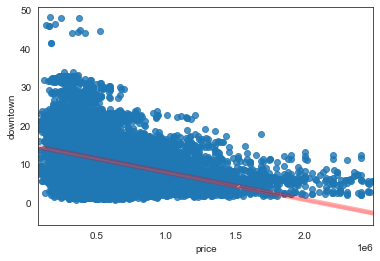

In [132]:
sns.regplot(data = data, x = 'price', y = 'downtown', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

In [133]:
data = data.loc[data['downtown'] < 25]

In [134]:
data['downtown'].max()

24.934920914948457

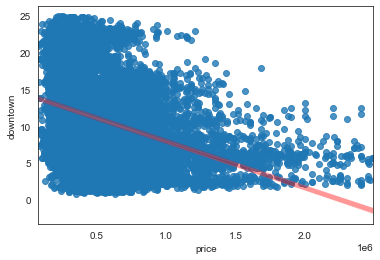

In [135]:
sns.regplot(data = data, x = 'price', y = 'downtown', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

We can see some clustering in this graph, showing us that prices decrease as distance from downtown increases in the maximum prices for homes. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='downtown'>

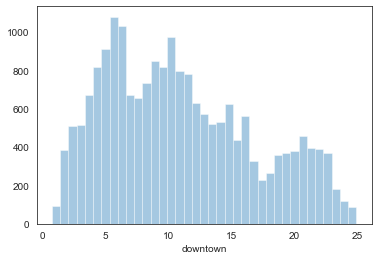

In [136]:
sns.distplot( a=data["downtown"], hist=True, kde=False, rug=False )

In [137]:
data['downtown'].describe()

count    20109.000000
mean        10.923908
std          5.919272
min          0.719565
25%          5.979404
50%         10.079701
75%         15.018175
max         24.934921
Name: downtown, dtype: float64

### Hospitals 

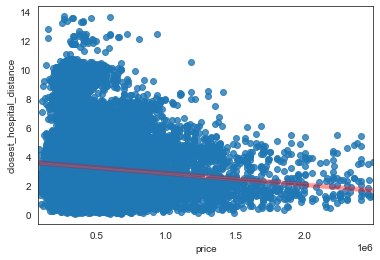

In [138]:
sns.regplot(data = data, x = 'price', y = 'closest_hospital_distance', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

Observations: while there are plenty of low priced homes close to hospitals, the upper limit of how expensive a home can be does look to go down the farther away from a hospital it is. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='closest_hospital_distance'>

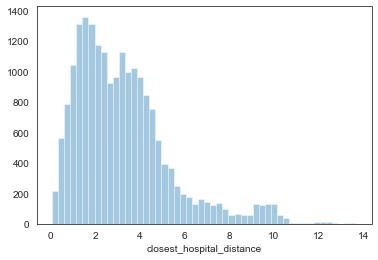

In [139]:
sns.distplot( a=data["closest_hospital_distance"], hist=True, kde=False, rug=False )

### Police Stations 

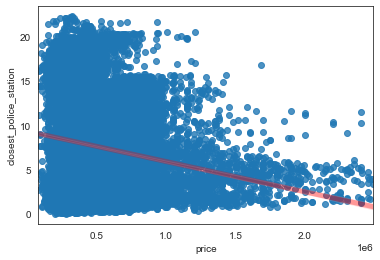

In [140]:
sns.regplot(data = data, x = 'price', y = 'closest_police_station', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

Observations: while there are plenty of low priced homes close to police stations, the upper limit of how expensive a home can be does look to go down the farther away from a police station it is, similar to hospitals.

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='closest_police_station'>

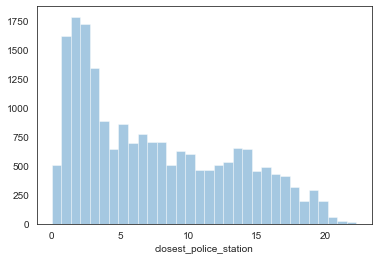

In [141]:
sns.distplot( a=data["closest_police_station"], hist=True, kde=False, rug=False )

### Schools 

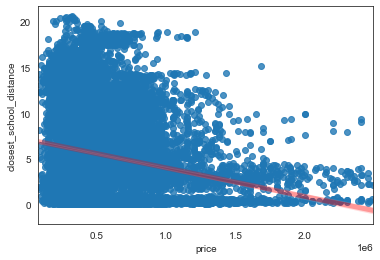

In [142]:
sns.regplot(data = data, x = 'price', y = 'closest_school_distance', 
            line_kws={"color":"r","alpha":0.3,"lw":5})
plt.show()

Observations: while there are plenty of low priced homes close to schools, the upper limit of how expensive a home can be does look to go down the farther away from a school it is, similar to hospitals and police stations.

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='closest_school_distance'>

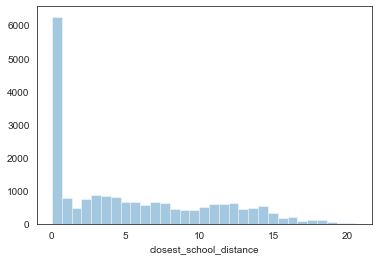

In [143]:
sns.distplot( a=data["closest_school_distance"], hist=True, kde=False, rug=False )

# Preparing for Modeling

### Dropping View and Waterfront Properties for Modeling

Since we are using a linear regression model, I must drop values on these binary features. 

In [151]:
data['view'].value_counts()

0.0    19419
1.0      690
Name: view, dtype: int64

In [152]:
data['waterfront'].value_counts()

0    20005
1      104
Name: waterfront, dtype: int64

As a majority of data does not have a view or a waterfront, in order to continue to have enough data to manipulate and have findings I must drop properties where these values are at 1. 

In [153]:
data = data.loc[data['view'] == 0]
data = data.loc[data['waterfront'] == 0]

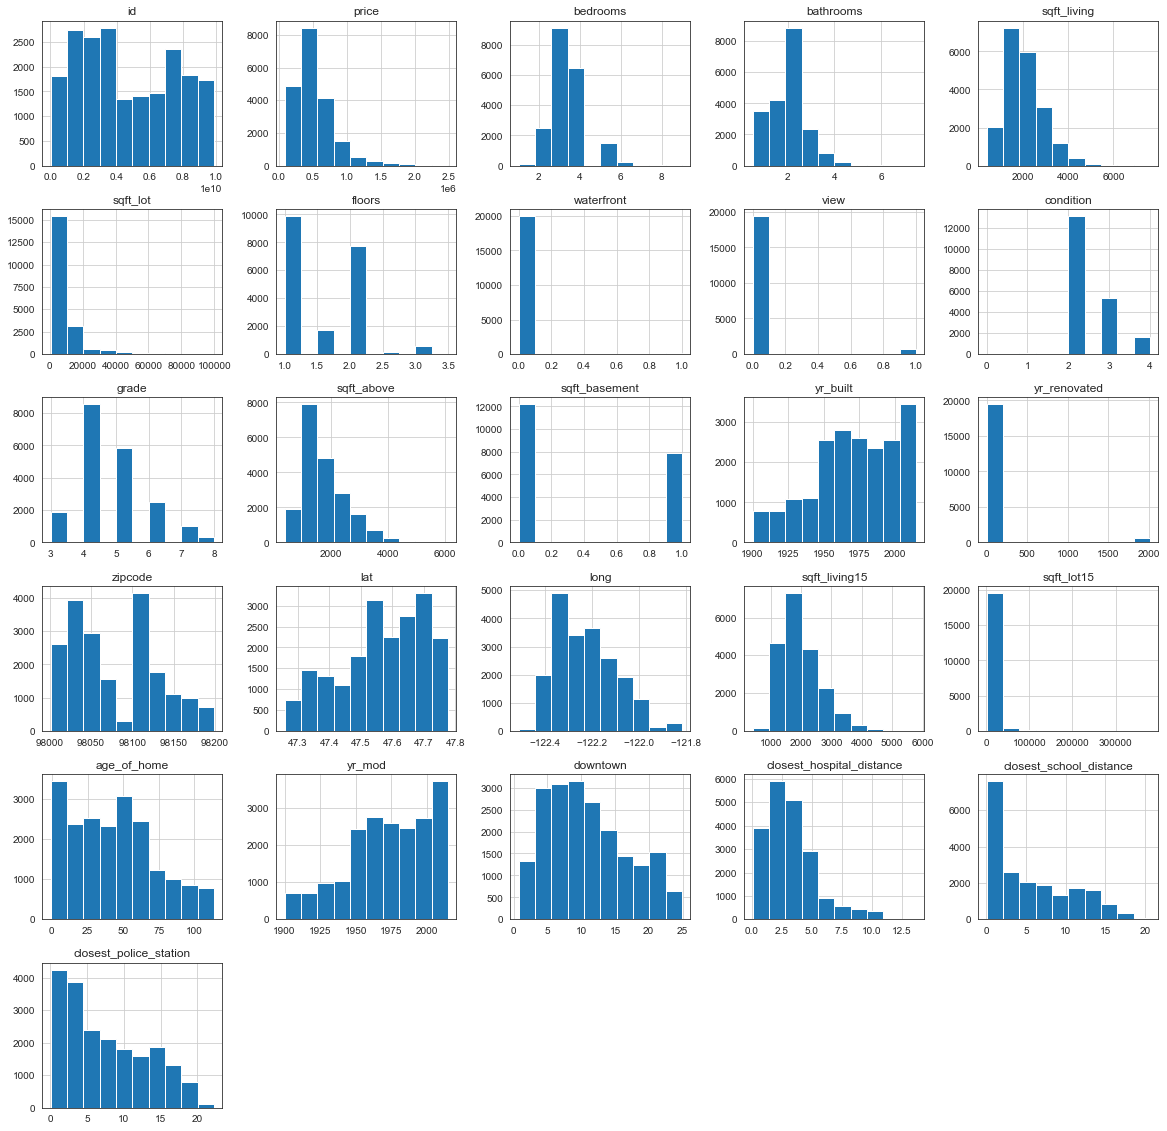

In [144]:
data.hist(figsize=(20,20));

# Zipcode

Using this kind of model, I'll need to pick one zipcode as the default zipcode so we can compare the price of a property going up or down depending on what zipcode it's in.

Seeing as this project aims to specifically research class disparity, I'll be using 98039 as my default zipcode, it's the wealthiest zipcode in Seattle.

CITATION: https://www.zipdatamaps.com/economics/income/agi/metro/wealthiest-zipcodes-in-metro-seattle-tacoma (Source: US Internal Revenue Service - 2018)

By comparing all other zipcodes to the wealthiest zipcode, we can see the full scope of how much a zipcode can affect property values. I'm assuming 1) that public infrastructure is working well in this zipcode, and is reflected partially in this wealth. I'm also assuming 2) that this zipcode was also the wealthiest zipcode in 2015.

FURTHER WORK:
I'd like to, in the future, expand this model to have user INPUT functionality, so the user can select which zipcode they'd like to make the default zipcode. That would allow for civic workers to compare each and every zipcode to each and ever zipcode in relative scale to each other.

In [145]:
zip_dummies = pd.get_dummies(data.zipcode, drop_first=False, prefix = 'zipcode')

# Concatenate the dummies to original dataframe
zipcode_data = pd.concat([data, zip_dummies], axis='columns')

## drop zipcode 98039 instead of "first"

In [146]:
zipcode_data= zipcode_data.drop(columns = 'zipcode_98039')

In [147]:
zipcode_data.shape

(20109, 94)

In [148]:
data.shape

(20109, 27)

I'll be using a combination of data and zipcode_data when appropriate, they are identical except one has each zipcode as a separate column and one does not. Having both of them is useful in making the correlation matrix.  

Use csvs when only working on models for speed, and api usage

In [150]:
# data = pd.read_csv('Data/Housing_Project_No_Dummies', 
#                    index_col="Unnamed: 0").reset_index(drop=True)
# zipcode_data = pd.read_csv('Data/Housing_Project_With_Zipcodes', 
#                    index_col="Unnamed: 0").reset_index(drop=True)

In [149]:
# data.to_csv('Housing_Project_No_Dummies')
# zipcode_data.to_csv('Housing_Project_With_Zipcodes')

# Seeing the Correlation 

The next step is to avoid multicollinearity by looking at the correlation matrix. When two columns have a correlation of over 70 percent, one will be chosen over the other for reasons described below.  

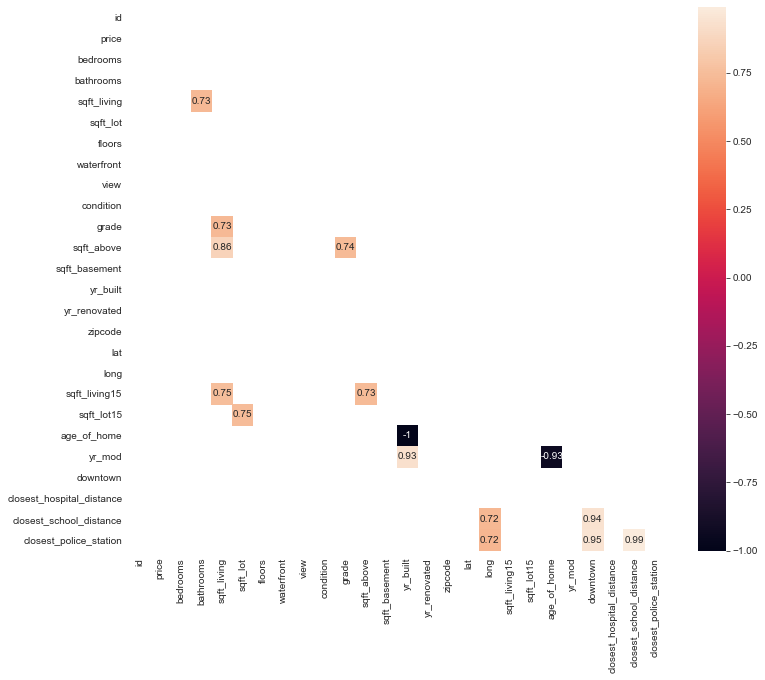

In [154]:
corr = data.corr()
# building the matrix
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
# defining the filter to only show half and avoid repeating columns
plt.figure(figsize=(12,10))
sns.heatmap(corr, mask = trimask | (np.abs(corr) <= 0.70), annot = True)
# visualizing the correlation in seaborn and setting it to only show a 
# correlation of over 70 percent

plt.savefig('correlation')

Choosing which features to drop: sqft_living has an over 70% correlation with sqft living15. This makes sense, the closest 15 neighbors to a home having a correlating size of living space. sqft_living also has a correlation with sqft_above, which also makes sense, as these features are very similar. sqft_lot is closely correlated with sqft_lot15 for similar reasons. sqft_living also is interestingly correlated with bathrooms. Because this feature is so correlated to others, I'll be dropping it. 

For only keeping one of those variables, Keeping sqft_15 makes sense because it's about the closest 15 neighbors, not about the property itself, which for our needs suits better since this metric is more closely related to the theory of mixed income housing. However, sqft_above is also too closely correlated with grade. And between sqft_above or grade, grade is the feature that we have most control of with renovation of the property. Therefore I'll be getting rid of sqft_above to keep grade as a feature. 


yr_built, yr_renovated and yr_mod are all correlating with each other at an over 70% rate which makes sense. Of the three features, I'm keeping yr_renovated since it's most closely related to our interests. 

Closest school is almost entirely predicted by closest police station and vice versa, so I'll be dropping closest police station as closest school has a more complex matrix of data associated with it. Downtown is shows multicollinearity with schools and police stations so I'll be dropping downtown also. 

Additionally, I'll be dropping zipcode since I've made those into dummies.

In [155]:
zipcode_data = zipcode_data.drop(columns = ['sqft_living', 'sqft_living15', 
                                            'sqft_lot', 'zipcode', 'yr_built',
                                            'yr_mod','downtown', 'sqft_above', 
                                            'closest_police_station'])
data = data.drop(columns = ['sqft_living', 'sqft_living15', 'sqft_lot', 
                            'zipcode', 'yr_built', 'yr_mod', 'downtown', 
                            'sqft_above', 'closest_police_station'])

# dropping these features from both data sets 

<AxesSubplot:>

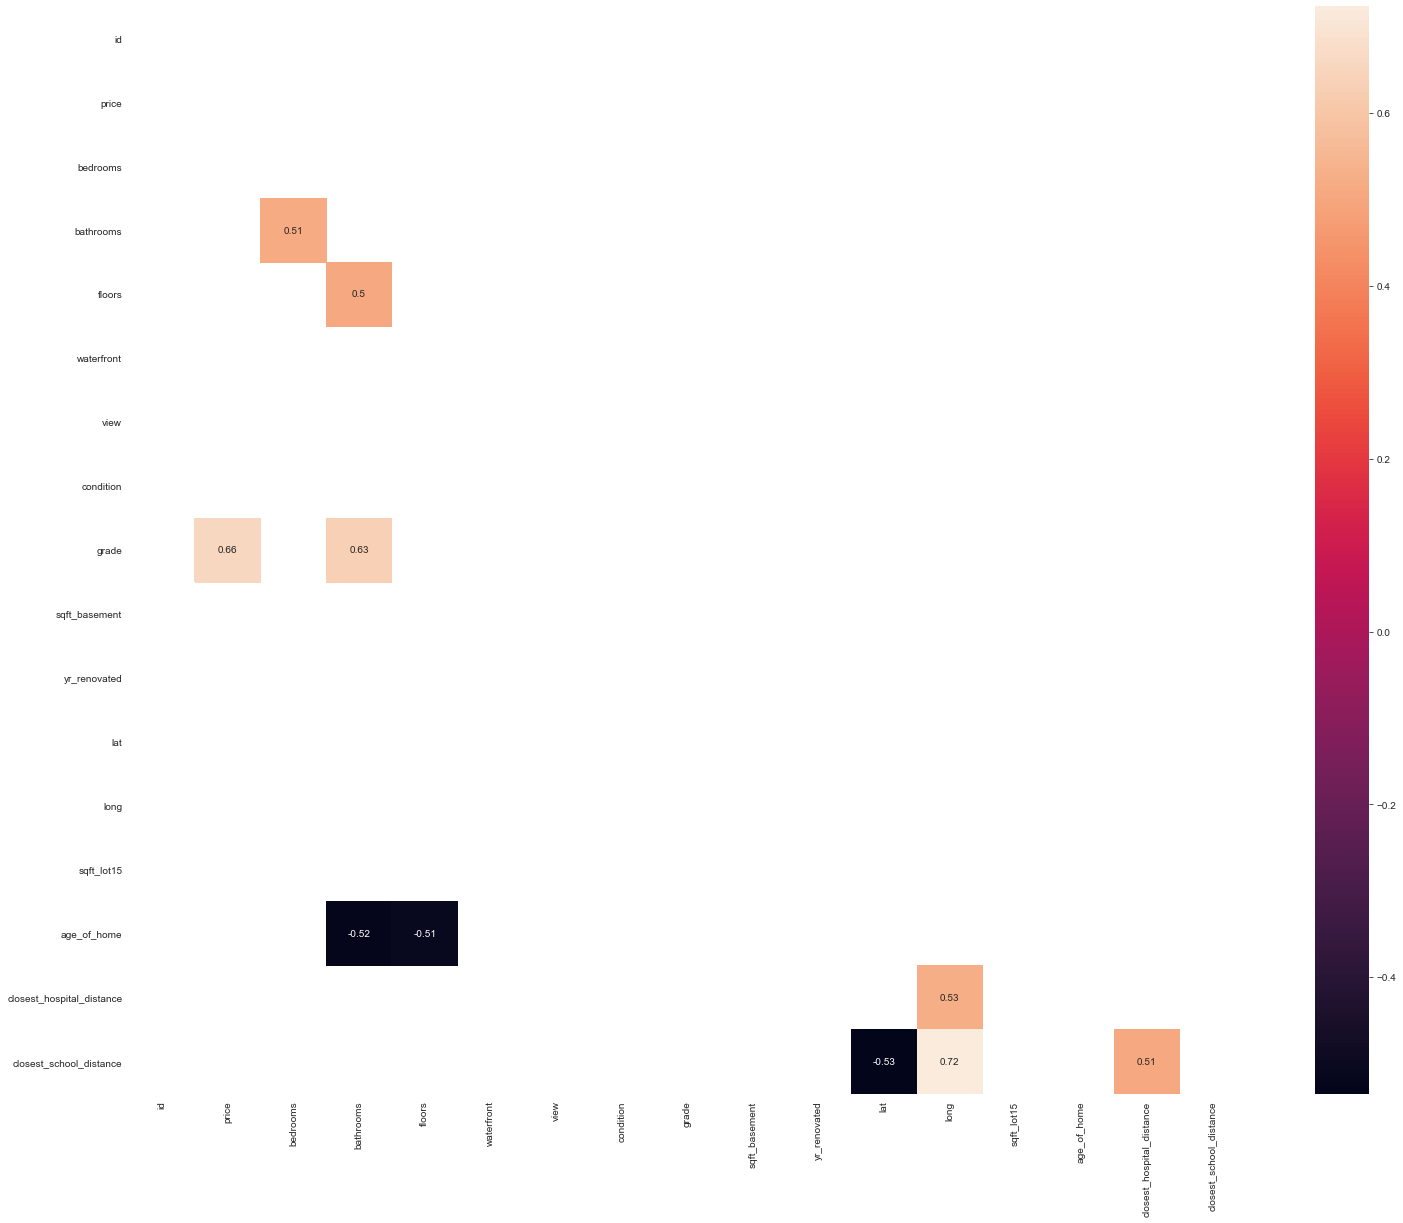

In [156]:
corr = data.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
plt.figure(figsize=(25,20))
sns.heatmap(corr, mask = trimask | (np.abs(corr) <= 0.5), annot = True)

# taking a look to see the results and to make sure there's nothing getting 
# close to 70 percent

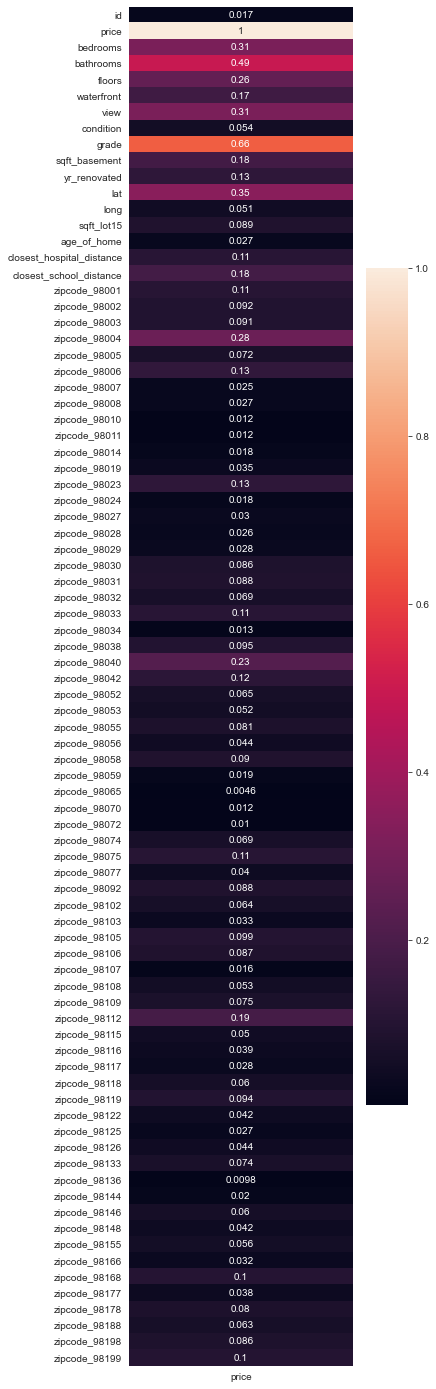

In [157]:
sns.set_style('white')

plt.figure(figsize=(5, 25))
sns.heatmap(abs(zipcode_data.corr())[['price']], annot=True);

# now we can see the correlation with price and get a sense of how important 
# zipcode data will be

In [158]:
order_and_values = np.abs(data.corr()['price']).sort_values(ascending = False)
# saving this series of features and correlations as an object

In [159]:
order = list(order_and_values.index)
# saving only the index of that series 

In [160]:
order.remove('price')
order.remove('id')
# removing price and id from order 

In [161]:
features_to_remove = []
# making an empty list of features to remove 
order = [feature for feature in order if feature not in features_to_remove]
# making sure the order doesn't include any of those features

# Building a model

I'm going to build to helper functions here, one to tell me which features have P values above 0.05 and are therefore unable to reject the null hypothesis (these features aren't doing a good job of predicting.) 

I'm also going to build a simple function to tell me the next three most correlated features in the order of features. 

#### Further work: 
Currently these two helper functions are sketched out but with more time and resources, I'd like to make the model building more automated. This will be beneficial for the civic workers tasked with using the model, and also higher quality code. For these preliminary models however, I wanted to keep a track of what features exactly I was including, which is why some of the code is repetitive. 

#### Bugs: 
Currently, the list features_to_remove never gets cleared of information. Ideally, it would be emptied before each iteration of the model. As things are right now, I don't end up needing to remove that many features, so this is working as well as it needs to for now. But with more time and resources, this functionality would be improved. 

In [162]:
def high_p_vals(model):
    p_vals = model.pvalues
    labels = list(model.pvalues.index)
    p_dict = dict(zip(labels, p_vals))
    for key, value in p_dict.items():
        if value > 0.05:
            features_to_remove.append(key)
        else:
            print(f'{key} has an acceptable p_value')
    return f'drop {features_to_remove} for the next model due to high p_value(s)'

In [163]:
def next_features(order, features_to_remove):
    print (order[0: 3])
    del order[0: 3]

## Baseline Model: Grade, Bathrooms, Lat

In [164]:
next_features(order, features_to_remove)

# finding out what features to include 

['grade', 'bathrooms', 'lat']


In [165]:
df_baseline = zipcode_data.loc[:, ['price', 'grade', 'bathrooms', 'lat']]
df_baseline.info()

# making a new DF with those features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      20109 non-null  float64
 1   grade      20109 non-null  int64  
 2   bathrooms  20109 non-null  float64
 3   lat        20109 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 785.5 KB


In [166]:
y = zipcode_data['price']
X = df_baseline.drop(['price'], axis = 1)

# assigning my X and y variables 

In [167]:
baseline_model = sm.OLS(y, sm.add_constant(X)).fit()
baseline_model.summary()

# building the model and getting a summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     7733.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:11:17   Log-Likelihood:            -2.7466e+05
No. Observations:               20109   AIC:                         5.493e+05
Df Residuals:                   20105   BIC:                         5.494e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.204e+07    5.2e+05    -61.661      0.000   -3.31e+07    -3.1e+07
grade       1.532e+05   1763.749     86.855      0.000     1.5e+05    1.57e+05
bathrooms   5.909e+04   2562.765     23.056      0.000    5.41e+04    6.41e+04
lat         6.671e+05   1.09e+04     61.000      0.000    6.46e+05    6.88e+05
==============================================================================
Omnibus:                     9630.547   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82449.520
Skew:                           2.124   Prob(JB):                         0.00
Kurtosis:                      11.964   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations: the model is currently predicting at above 50% accuracy, which is already a turning point, it's getting it right more than it's getting it wrong. The kurtosis however is way too high for only having three features, this must be fixed for the next model to not be broken. 

In [168]:
high_p_vals(baseline_model)

const has an acceptable p_value
grade has an acceptable p_value
bathrooms has an acceptable p_value
lat has an acceptable p_value


'drop [] for the next model due to high p_value(s)'

All the P values look good to continue. 

In [169]:
scaler = StandardScaler()

<AxesSubplot:ylabel='Count'>

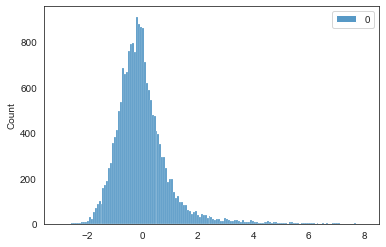

In [170]:
scaled_resid_1 = scaler.fit_transform(baseline_model.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_1)

Observations: very long tail on the right side, showing where the residuals are more than 2 standard deviations away from the mean. 

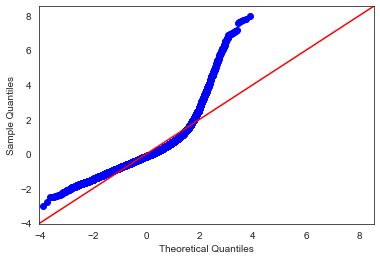

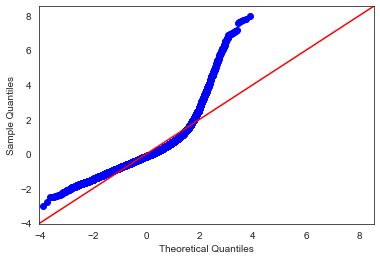

In [171]:
sm.qqplot(baseline_model.resid, dist = stats.norm, line = "45", fit = True)

Observations: the blue line curves up sharply from the red line at about 2 standard deviations from the mean, representing the long tail we saw in the above plot. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


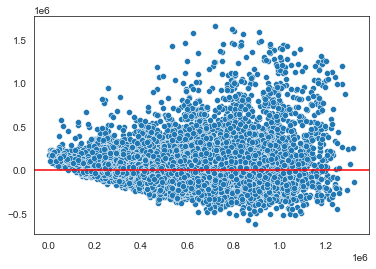

In [172]:
sns.scatterplot(baseline_model.predict(sm.add_constant(X)), baseline_model.resid)
plt.axhline(0, color = 'red')

Observations: There is a cone shape on the left side of this plot, representing homoscedasticity. This is to say that there isn't homogeneity of variance, which we must fix for the next model.  

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


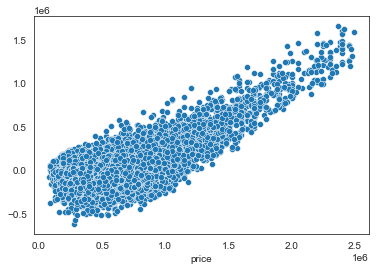

In [173]:
sns.scatterplot(y, baseline_model.resid);

Observations: This is a different way to see the homogeneity of the variance. This time, this visual doesn't tell us much. 

## Second Model: Transforming the Price with Log

<AxesSubplot:xlabel='price', ylabel='Count'>

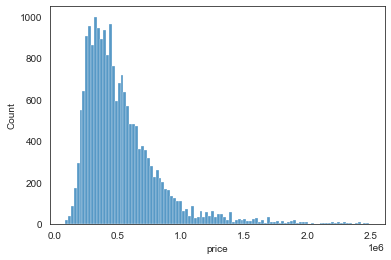

In [174]:
sns.histplot(zipcode_data['price'])

Price of home does not have a normal distribution in this data set. There are many more lower priced homes and a much longer tail on the right hand side, representing the lack of upward limit on home price. 

<AxesSubplot:xlabel='price', ylabel='Count'>

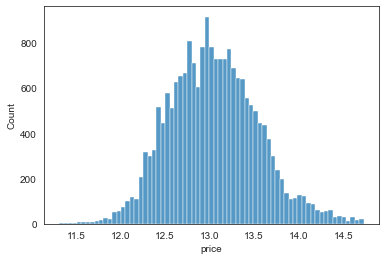

In [175]:
sns.histplot(np.log(zipcode_data['price']))

The log of the price however, does have a much more normal distribution. I'll be using the log of the price for all future models. 

#### NOTE: I'll now be interpreting the price by percentage instead of by dollar amount. 

In [176]:
zipcode_data['price_log'] = np.log(zipcode_data['price'])

# making a new column in the data for the log of the price for each row

In [177]:
price_log = zipcode_data['price_log']

In [178]:
features_2 = zipcode_data.loc[:,['price_log', 'grade', 'bathrooms', 'lat']]
features_2.info()

# making the dataframe for the second model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_log  20109 non-null  float64
 1   grade      20109 non-null  int64  
 2   bathrooms  20109 non-null  float64
 3   lat        20109 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 785.5 KB


In [179]:
y = features_2['price_log']
X = features_2.drop(['price_log'], axis = 1)

# labeling the axes

In [180]:
model_2 = sm.OLS(y, sm.add_constant(X)).fit()
model_2.summary()

# making the model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.142e+04
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:11:40   Log-Likelihood:                -4605.9
No. Observations:               20109   AIC:                             9220.
Df Residuals:                   20105   BIC:                             9251.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.4777      0.765    -80.415      0.000     -62.976     -59.979
grade          0.2405      0.003     92.689      0.000       0.235       0.246
bathrooms      0.1201      0.004     31.849      0.000       0.113       0.127
lat            1.5378      0.016     95.583      0.000       1.506       1.569
==============================================================================
Omnibus:                      665.532   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.241
Skew:                           0.367   Prob(JB):                    1.61e-192
Kurtosis:                       3.717   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations: the kurtosis is much lower now, and we've improved the accuracy of the model by about 10%. 

<AxesSubplot:ylabel='Count'>

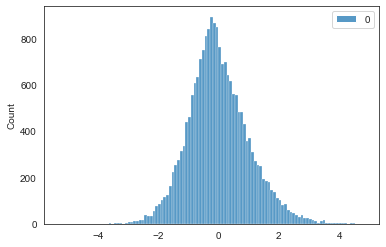

In [181]:
scaled_resid_2 = scaler.fit_transform(model_2.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_2)

Observations: these residuals fit a normal distribution much better. 

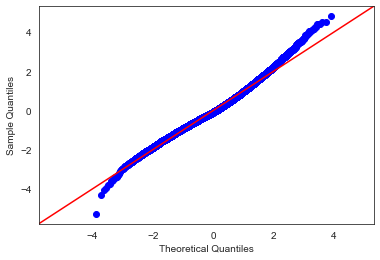

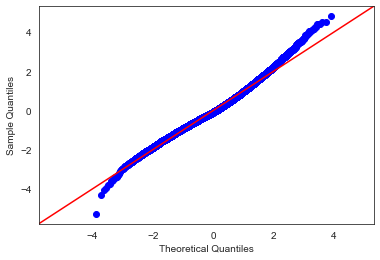

In [182]:
sm.qqplot(model_2.resid, dist = stats.norm, line = "45", fit = True)

The blue line is much closer to the red line, representing the more homogeneity of the variance. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


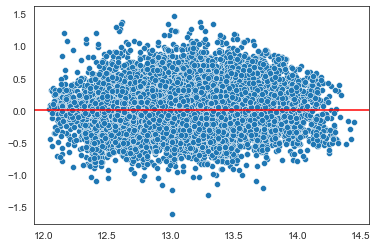

In [183]:
sns.scatterplot(model_2.predict(sm.add_constant(X)), model_2.resid)
plt.axhline(0, color = 'red')

Observations: the cone shape is gone now on the left side, representing that there isn't a pattern that the model isn't picking up. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


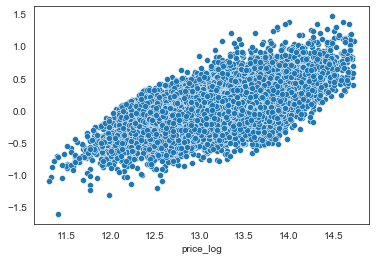

In [184]:
sns.scatterplot(y, model_2.resid);

Observations: the points are now a bit more scattered, which is what we are looking for.

# Improving the Model with Adding Features

## Third Model: Bedrooms, Floors, Closest School Distance

In [185]:
next_features(order, features_to_remove)

['bedrooms', 'floors', 'closest_school_distance']


In [187]:
features_3 = ['bedrooms', 'floors', 'closest_school_distance']

In [188]:
X = pd.concat([X, zipcode_data[features_3]], axis = 1)

In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grade                    20109 non-null  int64  
 1   bathrooms                20109 non-null  float64
 2   lat                      20109 non-null  float64
 3   bedrooms                 20109 non-null  int64  
 4   floors                   20109 non-null  float64
 5   closest_school_distance  20109 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


In [190]:
model_3 = sm.OLS(y, sm.add_constant(X)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     6345.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:12:40   Log-Likelihood:                -3921.6
No. Observations:               20109   AIC:                             7857.
Df Residuals:                   20102   BIC:                             7913.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -47.5642      0.888    -53.587      0.000     -49.304     -45.824
grade                       0.2541      0.003     98.400      0.000       0.249       0.259
bathrooms                   0.1149      0.004     27.024      0.000       0.107       0.123
lat                         1.2439      0.019     66.644      0.000       1.207       1.280
bedrooms                    0.0512      0.003     18.588      0.000       0.046       0.057
floors                     -0.0515      0.005    -11.309      0.000      -0.060      -0.043
closest_school_distance    -0.0147      0.000    -29.974      0.000      -0.016      -0.014
==============================================================================
Omnibus:                      488.259   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.526
Skew:                           0.261   Prob(JB):                    4.69e-158
Kurtosis:                       3.770   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations: adding these three features didn't make the accuracy jump by more than 3%. 

#### FURTHER WORK: 
I have not looked too deeply into floors as I have with some other variables. In the model, it's predicting that as floors decrease, the price rises. This isn't automatically intuitive, and bears further investigation. 

In [191]:
high_p_vals(model_3)

const has an acceptable p_value
grade has an acceptable p_value
bathrooms has an acceptable p_value
lat has an acceptable p_value
bedrooms has an acceptable p_value
floors has an acceptable p_value
closest_school_distance has an acceptable p_value


'drop [] for the next model due to high p_value(s)'

<AxesSubplot:ylabel='Count'>

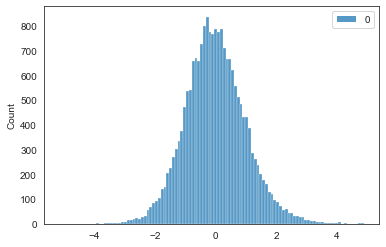

In [192]:
scaled_resid_3 = scaler.fit_transform(model_3.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_3)

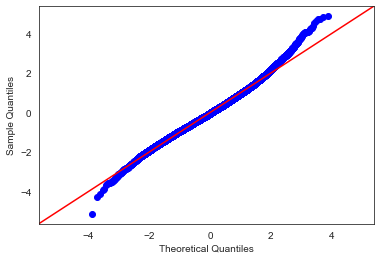

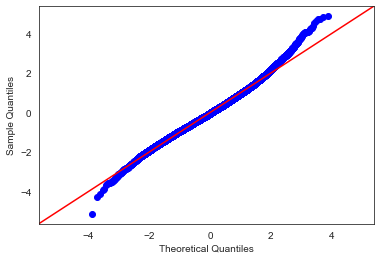

In [193]:
sm.qqplot(model_3.resid, dist = stats.norm, line = "45", fit = True)

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


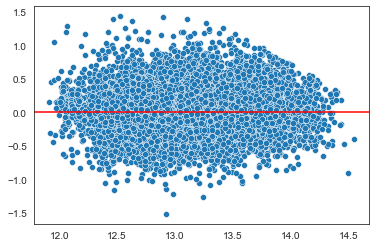

In [194]:
sns.scatterplot(model_3.predict(sm.add_constant(X)), model_3.resid)
plt.axhline(0, color = 'red')

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


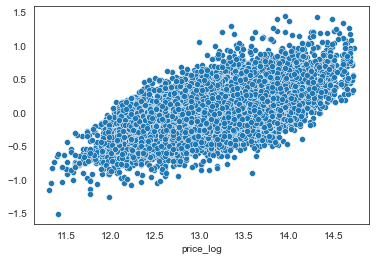

In [195]:
sns.scatterplot(y, model_3.resid);

Observations: these plots show that the model is functioning properly, represented by the lack of cone shapes in the scatterplots and the blue line being close to the red line on the QQ plot. 

## Fourth Model: Square Foot Basement, Closest Hospital Distance and Year Renovated

In [196]:
next_features(order, features_to_remove)

['sqft_basement', 'closest_hospital_distance', 'yr_renovated']


In [197]:
features_4 = ['sqft_basement', 'closest_hospital_distance', 'yr_renovated']

In [198]:
X = pd.concat([X, zipcode_data[features_4]], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grade                      20109 non-null  int64  
 1   bathrooms                  20109 non-null  float64
 2   lat                        20109 non-null  float64
 3   bedrooms                   20109 non-null  int64  
 4   floors                     20109 non-null  float64
 5   closest_school_distance    20109 non-null  float64
 6   sqft_basement              20109 non-null  float64
 7   closest_hospital_distance  20109 non-null  float64
 8   yr_renovated               20109 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.5 MB


In [199]:
model_4 = sm.OLS(y, sm.add_constant(X)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     4425.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:14:01   Log-Likelihood:                -3622.3
No. Observations:               20109   AIC:                             7265.
Df Residuals:                   20099   BIC:                             7344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -48.8195      0.877    -55.692      0.000     -50.538     -47.101
grade                         0.2544      0.003     99.960      0.000       0.249       0.259
bathrooms                     0.0927      0.004     21.048      0.000       0.084       0.101
lat                           1.2699      0.018     68.887      0.000       1.234       1.306
bedrooms                      0.0493      0.003     18.161      0.000       0.044       0.055
floors                       -0.0231      0.005     -4.691      0.000      -0.033      -0.013
closest_school_distance      -0.0095      0.001    -16.955      0.000      -0.011      -0.008
sqft_basement                 0.0681      0.005     13.854      0.000       0.058       0.078
closest_hospital_distance    -0.0101      0.001     -9.025      0.000      -0.012      -0.008
yr_renovated                  0.0001   5.74e-06     17.732      0.000    9.05e-05       0.000
==============================================================================
Omnibus:                      462.986   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.306
Skew:                           0.245   Prob(JB):                    6.30e-152
Kurtosis:                       3.768   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
high_p_vals(model_4)

const has an acceptable p_value
grade has an acceptable p_value
bathrooms has an acceptable p_value
lat has an acceptable p_value
bedrooms has an acceptable p_value
floors has an acceptable p_value
closest_school_distance has an acceptable p_value
sqft_basement has an acceptable p_value
closest_hospital_distance has an acceptable p_value
yr_renovated has an acceptable p_value


'drop [] for the next model due to high p_value(s)'

<AxesSubplot:ylabel='Count'>

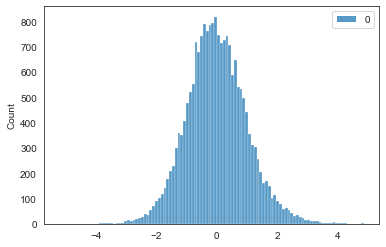

In [201]:
scaled_resid_4 = scaler.fit_transform(model_4.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_4)

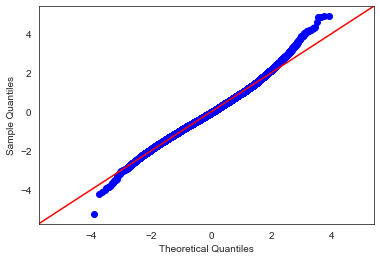

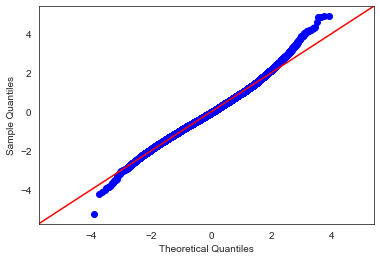

In [202]:
sm.qqplot(model_4.resid, dist = stats.norm, line = "45", fit = True)

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


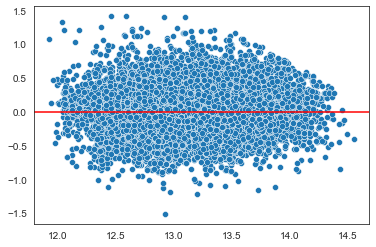

In [203]:
sns.scatterplot(model_4.predict(sm.add_constant(X)), model_4.resid)
plt.axhline(0, color = 'red')

Observations: now there is a slight cone shape on the right side. It isn't dramatic so I will not do anything to fix it for the next model. 

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


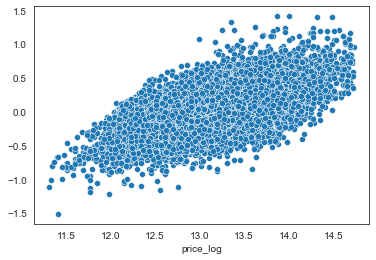

In [204]:
sns.scatterplot(y, model_4.resid);

Observations: 

## Fifth Model: Square Foot Lot of Closest 15 Neighbors, Longitude and Age of Home

In [205]:

next_features(order, features_to_remove)

['sqft_lot15', 'long', 'age_of_home']


In [206]:
features_5 = ['sqft_lot15', 'long', 'age_of_home']

In [207]:
X = pd.concat([X, zipcode_data[features_5]], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grade                      20109 non-null  int64  
 1   bathrooms                  20109 non-null  float64
 2   lat                        20109 non-null  float64
 3   bedrooms                   20109 non-null  int64  
 4   floors                     20109 non-null  float64
 5   closest_school_distance    20109 non-null  float64
 6   sqft_basement              20109 non-null  float64
 7   closest_hospital_distance  20109 non-null  float64
 8   yr_renovated               20109 non-null  float64
 9   sqft_lot15                 20109 non-null  int64  
 10  long                       20109 non-null  float64
 11  age_of_home                20109 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 2.0 MB


In [208]:
model_5 = sm.OLS(y, sm.add_constant(X)).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     4061.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:14:45   Log-Likelihood:                -2228.1
No. Observations:               20109   AIC:                             4482.
Df Residuals:                   20096   BIC:                             4585.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        38.8066      3.793     10.230      0.000      31.371      46.242
grade                         0.2638      0.002    108.990      0.000       0.259       0.269
bathrooms                     0.1447      0.004     33.827      0.000       0.136       0.153
lat                           1.0325      0.020     52.198      0.000       0.994       1.071
bedrooms                      0.0248      0.003      9.635      0.000       0.020       0.030
floors                        0.0537      0.005     11.083      0.000       0.044       0.063
closest_school_distance      -0.0142      0.001    -18.919      0.000      -0.016      -0.013
sqft_basement                 0.0709      0.005     15.371      0.000       0.062       0.080
closest_hospital_distance    -0.0121      0.001    -11.028      0.000      -0.014      -0.010
yr_renovated                3.42e-05   5.53e-06      6.180      0.000    2.34e-05    4.51e-05
sqft_lot15                 1.327e-06   1.66e-07      8.005      0.000       1e-06    1.65e-06
long                          0.6275      0.027     23.676      0.000       0.576       0.679
age_of_home                   0.0047   9.55e-05     49.513      0.000       0.005       0.005
==============================================================================
Omnibus:                      510.166   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.868
Skew:                           0.171   Prob(JB):                    3.11e-220
Kurtosis:                       4.044   Cond. No.                     3.12e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
high_p_vals(model_5)

const has an acceptable p_value
grade has an acceptable p_value
bathrooms has an acceptable p_value
lat has an acceptable p_value
bedrooms has an acceptable p_value
floors has an acceptable p_value
closest_school_distance has an acceptable p_value
sqft_basement has an acceptable p_value
closest_hospital_distance has an acceptable p_value
yr_renovated has an acceptable p_value
sqft_lot15 has an acceptable p_value
long has an acceptable p_value
age_of_home has an acceptable p_value


'drop [] for the next model due to high p_value(s)'

<AxesSubplot:ylabel='Count'>

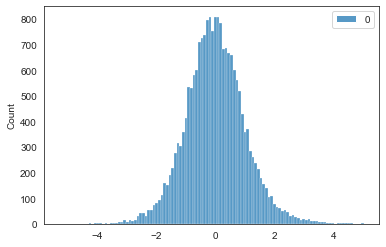

In [210]:
scaled_resid_5 = scaler.fit_transform(model_5.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_5)

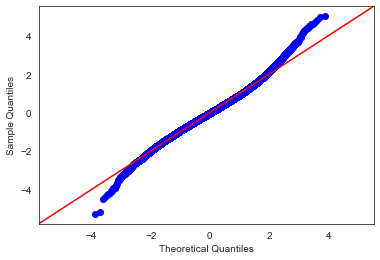

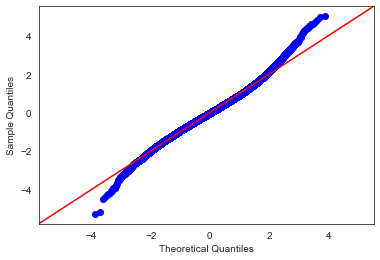

In [211]:
sm.qqplot(model_5.resid, dist = stats.norm, line = "45", fit = True)

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


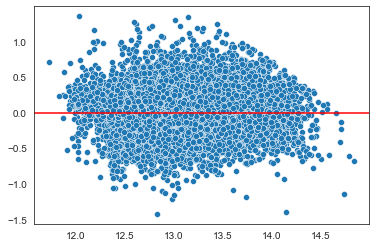

In [212]:
sns.scatterplot(model_5.predict(sm.add_constant(X)), model_5.resid)
plt.axhline(0, color = 'red')

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_log'>

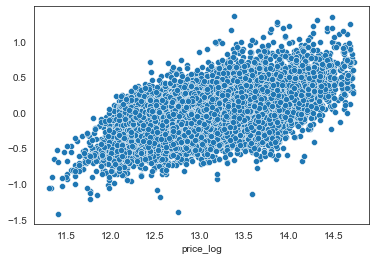

In [213]:
sns.scatterplot(y, model_5.resid)

## Sixth Model: Condition, Waterfront and View

In [214]:
next_features(order, features_to_remove)

['condition', 'waterfront', 'view']


In [215]:
features_6 = ['condition', 'waterfront', 'view']

In [216]:
X = pd.concat([X, zipcode_data[features_6]], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grade                      20109 non-null  int64  
 1   bathrooms                  20109 non-null  float64
 2   lat                        20109 non-null  float64
 3   bedrooms                   20109 non-null  int64  
 4   floors                     20109 non-null  float64
 5   closest_school_distance    20109 non-null  float64
 6   sqft_basement              20109 non-null  float64
 7   closest_hospital_distance  20109 non-null  float64
 8   yr_renovated               20109 non-null  float64
 9   sqft_lot15                 20109 non-null  int64  
 10  long                       20109 non-null  float64
 11  age_of_home                20109 non-null  int64  
 12  condition                  20109 non-null  int64  
 13  waterfront                 20109 non-null  int

In [217]:
model_6 = sm.OLS(y, sm.add_constant(X)).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     3581.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:15:22   Log-Likelihood:                -1523.8
No. Observations:               20109   AIC:                             3080.
Df Residuals:                   20093   BIC:                             3206.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        42.2314      3.670     11.508      0.000      35.038      49.425
grade                         0.2537      0.002    106.983      0.000       0.249       0.258
bathrooms                     0.1310      0.004     31.567      0.000       0.123       0.139
lat                           1.0681      0.019     55.838      0.000       1.031       1.106
bedrooms                      0.0273      0.002     10.967      0.000       0.022       0.032
floors                        0.0618      0.005     13.155      0.000       0.053       0.071
closest_school_distance      -0.0143      0.001    -19.704      0.000      -0.016      -0.013
sqft_basement                 0.0595      0.004     13.318      0.000       0.051       0.068
closest_hospital_distance    -0.0147      0.001    -13.860      0.000      -0.017      -0.013
yr_renovated               4.085e-05   5.42e-06      7.535      0.000    3.02e-05    5.15e-05
sqft_lot15                 9.999e-07    1.6e-07      6.231      0.000    6.85e-07    1.31e-06
long                          0.6699      0.026     26.104      0.000       0.620       0.720
age_of_home                   0.0039   9.73e-05     39.708      0.000       0.004       0.004
condition                     0.0637      0.003     20.160      0.000       0.058       0.070
waterfront                    0.4374      0.028     15.789      0.000       0.383       0.492
view                          0.2322      0.011     20.658      0.000       0.210       0.254
==============================================================================
Omnibus:                      364.970   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              681.985
Skew:                           0.114   Prob(JB):                    8.11e-149
Kurtosis:                       3.873   Cond. No.                     3.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
high_p_vals(model_6)

const has an acceptable p_value
grade has an acceptable p_value
bathrooms has an acceptable p_value
lat has an acceptable p_value
bedrooms has an acceptable p_value
floors has an acceptable p_value
closest_school_distance has an acceptable p_value
sqft_basement has an acceptable p_value
closest_hospital_distance has an acceptable p_value
yr_renovated has an acceptable p_value
sqft_lot15 has an acceptable p_value
long has an acceptable p_value
age_of_home has an acceptable p_value
condition has an acceptable p_value
waterfront has an acceptable p_value
view has an acceptable p_value


'drop [] for the next model due to high p_value(s)'

<AxesSubplot:ylabel='Count'>

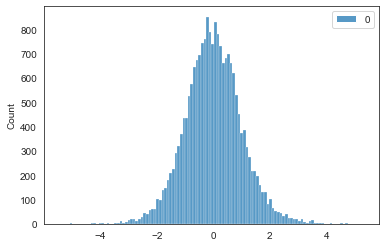

In [219]:
scaled_resid_6 = scaler.fit_transform(model_6.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_6)

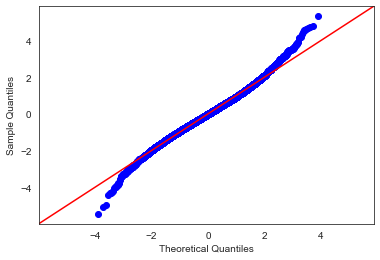

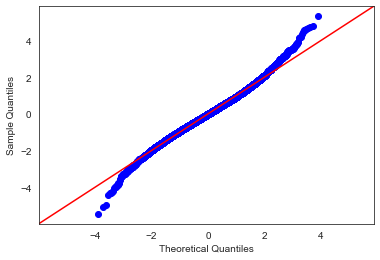

In [220]:
sm.qqplot(model_6.resid, dist = stats.norm, line = "45", fit = True)

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


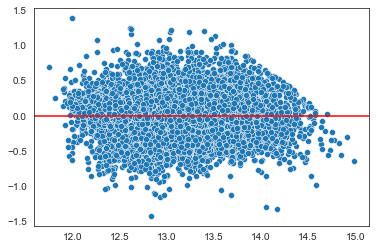

In [221]:
sns.scatterplot(model_6.predict(sm.add_constant(X)), model_6.resid)
plt.axhline(0, color = 'red')

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_log'>

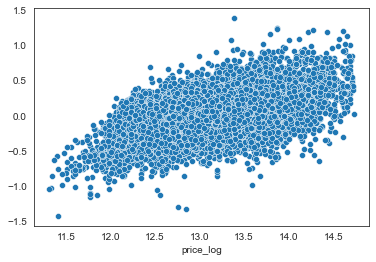

In [222]:
sns.scatterplot(y, model_6.resid)

## Seventh Model: Adding Zipcodes 

In [223]:
zipcode_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated', 'lat',
       'long', 'sqft_lot15', 'age_of_home', 'closest_hospital_distance',
       'closest_school_distance', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98040', 'zipcode_98042', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zip

In [224]:
features_7 = ['zipcode_98001',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

In [225]:
X = pd.concat([X, zipcode_data[features_7]], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21596
Data columns (total 82 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grade                      20109 non-null  int64  
 1   bathrooms                  20109 non-null  float64
 2   lat                        20109 non-null  float64
 3   bedrooms                   20109 non-null  int64  
 4   floors                     20109 non-null  float64
 5   closest_school_distance    20109 non-null  float64
 6   sqft_basement              20109 non-null  float64
 7   closest_hospital_distance  20109 non-null  float64
 8   yr_renovated               20109 non-null  float64
 9   sqft_lot15                 20109 non-null  int64  
 10  long                       20109 non-null  float64
 11  age_of_home                20109 non-null  int64  
 12  condition                  20109 non-null  int64  
 13  waterfront                 20109 non-null  int

In [226]:
model_7 = sm.OLS(y, sm.add_constant(X)).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1214.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:16:44   Log-Likelihood:                 3362.1
No. Observations:               20109   AIC:                            -6558.
Df Residuals:                   20026   BIC:                            -5902.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        47.8036     13.792      3.466      0.001      20.771      74.837
grade                         0.1956      0.002     96.774      0.000       0.192       0.200
bathrooms                     0.1189      0.003     36.244      0.000       0.112       0.125
lat                           0.1413      0.096      1.476      0.140      -0.046       0.329
bedrooms                      0.0472      0.002     23.504      0.000       0.043       0.051
floors                        0.0090      0.004      2.217      0.027       0.001       0.017
closest_school_distance      -0.0149      0.002     -7.164      0.000      -0.019      -0.011
sqft_basement                 0.0232      0.004      6.387      0.000       0.016       0.030
closest_hospital_distance     0.0035      0.002      1.738      0.082      -0.000       0.007
yr_renovated               2.939e-05   4.28e-06      6.863      0.000     2.1e-05    3.78e-05
sqft_lot15                 1.499e-06   1.37e-07     10.941      0.000    1.23e-06    1.77e-06
long                          0.3452      0.103      3.359      0.001       0.144       0.547
age_of_home                   0.0020   8.34e-05     24.346      0.000       0.002       0.002
condition                     0.0489      0.003     19.162      0.000       0.044       0.054
waterfront                    0.4774      0.022     21.645      0.000       0.434       0.521
view                          0.2483      0.009     27.783      0.000       0.231       0.266
zipcode_98001                -1.0651      0.048    -22.256      0.000      -1.159      -0.971
zipcode_98002                -1.1205      0.048    -23.426      0.000      -1.214      -1.027
zipcode_98003                -1.0674      0.049    -21.753      0.000      -1.164      -0.971
zipcode_98004                -0.1605      0.037     -4.357      0.000      -0.233      -0.088
zipcode_98005                -0.5468      0.039    -14.099      0.000      -0.623      -0.471
zipcode_98006                -0.6244      0.037    -16.771      0.000      -0.697      -0.551
zipcode_98007                -0.6506      0.040    -16.379      0.000      -0.728      -0.573
zipcode_98008                -0.6316      0.038    -16.490      0.000      -0.707      -0.557
zipcode_98010                -0.7942      0.055    -14.414      0.000      -0.902      -0.686
zipcode_98011                -0.8205      0.040    -20.365      0.000      -0.899      -0.742
zipcode_98014                -0.8393      0.052    -16.156      0.000      -0.941      -0.737
zipcode_98019                -0.8698      0.048    -18.030      0.000      -0.964      -0.775
zipcode_98023                -1.0719      0.052    -20.813      0.000      -1.173      -0.971
zipcode_98024                -0.7849      0.055    -14.285      0.000      

In [227]:
high_p_vals(model_7)

const has an acceptable p_value
grade has an acceptable p_value
bathrooms has an acceptable p_value
bedrooms has an acceptable p_value
floors has an acceptable p_value
closest_school_distance has an acceptable p_value
sqft_basement has an acceptable p_value
yr_renovated has an acceptable p_value
sqft_lot15 has an acceptable p_value
long has an acceptable p_value
age_of_home has an acceptable p_value
condition has an acceptable p_value
waterfront has an acceptable p_value
view has an acceptable p_value
zipcode_98001 has an acceptable p_value
zipcode_98002 has an acceptable p_value
zipcode_98003 has an acceptable p_value
zipcode_98004 has an acceptable p_value
zipcode_98005 has an acceptable p_value
zipcode_98006 has an acceptable p_value
zipcode_98007 has an acceptable p_value
zipcode_98008 has an acceptable p_value
zipcode_98010 has an acceptable p_value
zipcode_98011 has an acceptable p_value
zipcode_98014 has an acceptable p_value
zipcode_98019 has an acceptable p_value
zipcode_98023

"drop ['lat', 'closest_hospital_distance'] for the next model due to high p_value(s)"

Adding in zipcodes has made the latitude and the closest hospital distance irrelevant as predictors and I'll be removing those features for the next iteration of the model. 

<AxesSubplot:ylabel='Count'>

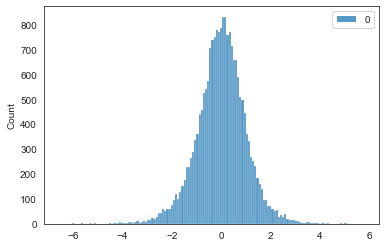

In [228]:
scaled_resid_7 = scaler.fit_transform(model_7.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_7)

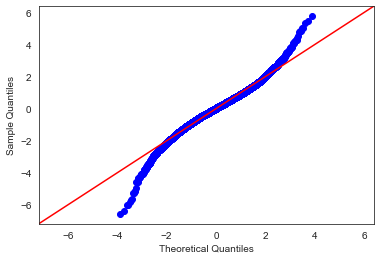

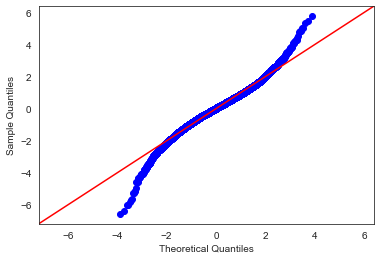

In [229]:
sm.qqplot(model_7.resid, dist = stats.norm, line = "45", fit = True)

Observations: zipcode data has moved the model into performing less well, in that there are now more residuals in the -4 through -2 and 2 through 4 distances away from the mean. Basically, the model is predicting less correctly where the blue line isn't resting on the red line. 

In [ ]:
sns.scatterplot(model_7.predict(sm.add_constant(X)), model_7.resid)
plt.axhline(0, color = 'red')

In [ ]:
sns.scatterplot(y, model_7.resid)

## Eighth Model: Latitude and Closest Hospital Distance

In [230]:
X = X.drop(columns = ['lat', 'closest_hospital_distance'])

In [231]:
features_8 = [col for col in X.columns]

In [232]:
X = zipcode_data.loc[:, features_8]

In [233]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21596
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grade                    20109 non-null  int64  
 1   bathrooms                20109 non-null  float64
 2   bedrooms                 20109 non-null  int64  
 3   floors                   20109 non-null  float64
 4   closest_school_distance  20109 non-null  float64
 5   sqft_basement            20109 non-null  float64
 6   yr_renovated             20109 non-null  float64
 7   sqft_lot15               20109 non-null  int64  
 8   long                     20109 non-null  float64
 9   age_of_home              20109 non-null  int64  
 10  condition                20109 non-null  int64  
 11  waterfront               20109 non-null  int64  
 12  view                     20109 non-null  float64
 13  zipcode_98001            20109 non-null  uint8  
 14  zipcode_98002         

In [234]:
model_8 = sm.OLS(y, sm.add_constant(X)).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:17:24   Log-Likelihood:                 3359.0
No. Observations:               20109   AIC:                            -6556.
Df Residuals:                   20028   BIC:                            -5915.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      59.3705     12.416      4.782      0.000      35.033      83.708
grade                       0.1958      0.002     97.090      0.000       0.192       0.200
bathrooms                   0.1189      0.003     36.236      0.000       0.112       0.125
bedrooms                    0.0472      0.002     23.524      0.000       0.043       0.051
floors                      0.0085      0.004      2.093      0.036       0.001       0.016
closest_school_distance    -0.0156      0.002     -8.256      0.000      -0.019      -0.012
sqft_basement               0.0231      0.004      6.369      0.000       0.016       0.030
yr_renovated             2.955e-05   4.28e-06      6.900      0.000    2.12e-05    3.79e-05
sqft_lot15               1.511e-06   1.37e-07     11.064      0.000    1.24e-06    1.78e-06
long                        0.3847      0.102      3.788      0.000       0.186       0.584
age_of_home                 0.0020   8.34e-05     24.341      0.000       0.002       0.002
condition                   0.0489      0.003     19.156      0.000       0.044       0.054
waterfront                  0.4777      0.022     21.677      0.000       0.435       0.521
view                        0.2485      0.009     27.801      0.000       0.231       0.266
zipcode_98001              -1.0989      0.043    -25.647      0.000      -1.183      -1.015
zipcode_98002              -1.1603      0.043    -27.231      0.000      -1.244      -1.077
zipcode_98003              -1.0991      0.045    -24.654      0.000      -1.187      -1.012
zipcode_98004              -0.1644      0.037     -4.469      0.000      -0.237      -0.092
zipcode_98005              -0.5509      0.039    -14.229      0.000      -0.627      -0.475
zipcode_98006              -0.6270      0.037    -17.067      0.000      -0.699      -0.555
zipcode_98007              -0.6522      0.040    -16.435      0.000      -0.730      -0.574
zipcode_98008              -0.6295      0.038    -16.446      0.000      -0.705      -0.554
zipcode_98010              -0.8111      0.050    -16.078      0.000      -0.910      -0.712
zipcode_98011              -0.7988      0.038    -21.041      0.000      -0.873      -0.724
zipcode_98014              -0.8071      0.050    -16.063      0.000      -0.906      -0.709
zipcode_98019              -0.8281      0.045    -18.510      0.000      -0.916      -0.740
zipcode_98023              -1.1031      0.048    -23.188      0.000      -1.196      -1.010
zipcode_98024              -0.7940      0.055    -14.538      0.000      -0.901      -0.687
zipcode_98027              -0.7243      0.040    -18.289      0.000      -0.802      -0.647
zipcode_98028              -0.8488      0.037    -22.958      0.000      -0.921      -0.776
zipcode_98029              -0.6602      0.041  

In [235]:
high_p_vals(model_8)

const has an acceptable p_value
grade has an acceptable p_value
bathrooms has an acceptable p_value
bedrooms has an acceptable p_value
floors has an acceptable p_value
closest_school_distance has an acceptable p_value
sqft_basement has an acceptable p_value
yr_renovated has an acceptable p_value
sqft_lot15 has an acceptable p_value
long has an acceptable p_value
age_of_home has an acceptable p_value
condition has an acceptable p_value
waterfront has an acceptable p_value
view has an acceptable p_value
zipcode_98001 has an acceptable p_value
zipcode_98002 has an acceptable p_value
zipcode_98003 has an acceptable p_value
zipcode_98004 has an acceptable p_value
zipcode_98005 has an acceptable p_value
zipcode_98006 has an acceptable p_value
zipcode_98007 has an acceptable p_value
zipcode_98008 has an acceptable p_value
zipcode_98010 has an acceptable p_value
zipcode_98011 has an acceptable p_value
zipcode_98014 has an acceptable p_value
zipcode_98019 has an acceptable p_value
zipcode_98023

"drop ['lat', 'closest_hospital_distance'] for the next model due to high p_value(s)"

<AxesSubplot:ylabel='Count'>

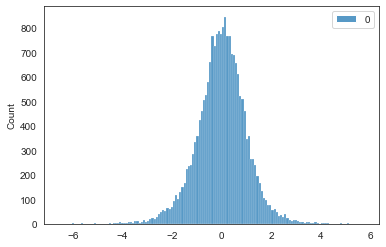

In [236]:
scaled_resid_8 = scaler.fit_transform(model_8.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_8)

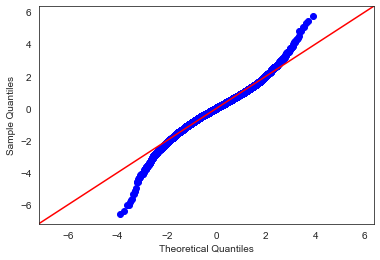

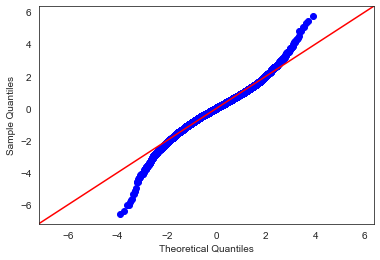

In [237]:
sm.qqplot(model_8.resid, dist = stats.norm, line = "45", fit = True)

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


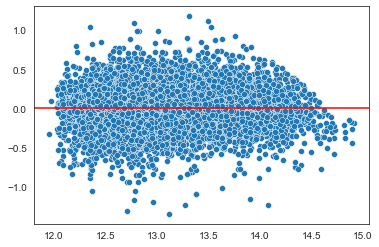

In [238]:
sns.scatterplot(model_8.predict(sm.add_constant(X)), model_8.resid)
plt.axhline(0, color = 'red')

/Users/b0ihazard/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_log'>

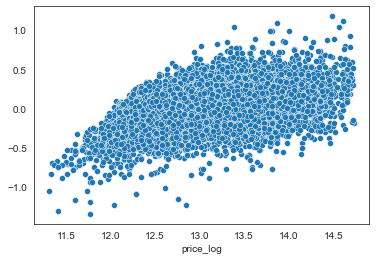

In [239]:
sns.scatterplot(y, model_8.resid)

# Conclusion

I'm going to generate a report of the findings of the model's coefficiants.  

In [240]:
pd.set_option('display.max_rows', None)

coeff_s = model_8.params
coeff_s = coeff_s.drop('const')

labels = coeff_s.index
coefficiants = dict(zip(labels, coeff_s))

# grabbing the coefficiants from the stats models reports 

By generating a report of the findings, should this model be used on other data in the future, understanding the model will become much more approachable and user friendly. This is good news for the civic workers that will be using this model. 

In [241]:
for x, y in coefficiants.items():
    y = y * 100
    if x.startswith('view') or x.startswith('waterfront'):
        print (f' If {x} was a feature of a property, the price would rise by {y:.2f} percent.')
    elif not x.startswith('zipcode') and not x.startswith('const'):
        print (f' As {x} increases by one unit, the price changes by {y:.2f} percent.')
    else: 
        x.startswith('zipcode') and not x.startswith('const')   
        print (f' If a property was in {x} zipcode instead of 98039, the price would change by {y:.2f}  percent.')
        
        ## must drop 0 for binary values for waterfront and view 
        ## same logic as dummying / one hot encoding 
        
        ## explain 0% changes in variables

 As grade increases by one unit, the price changes by 19.58 percent.
 As bathrooms increases by one unit, the price changes by 11.89 percent.
 As bedrooms increases by one unit, the price changes by 4.72 percent.
 As floors increases by one unit, the price changes by 0.85 percent.
 As closest_school_distance increases by one unit, the price changes by -1.56 percent.
 As sqft_basement increases by one unit, the price changes by 2.31 percent.
 As yr_renovated increases by one unit, the price changes by 0.00 percent.
 As sqft_lot15 increases by one unit, the price changes by 0.00 percent.
 As long increases by one unit, the price changes by 38.47 percent.
 As age_of_home increases by one unit, the price changes by 0.20 percent.
 As condition increases by one unit, the price changes by 4.89 percent.
 If waterfront was a feature of a property, the price would rise by 47.77 percent.
 If view was a feature of a property, the price would rise by 24.85 percent.
 If a property was in zipcode_980

# Recommendations: 
1) As we can read in the printed report above, improving the grade and the condition (as is our aim with renovations) would make the value of the properties increase by roughly 1/4th. *Therefore* I'm recommending that the city of Seattle focus on improving both grade and condition of properties during the renovation. In the report, year_renovated by itself had little affect on the price of the home. The conclusion here is that it's not enough to simply renovate a home, but we must improve it's condition and/or grade with that renovation. 

Choosing which properties to renovate: the properties where the least expensive changes will increase the grade, and/or condition of the property are a safe bet for a high return on investment. 

2) There are certain zipcodes where the class disparity is quite large. I recommend that the city of Seattle spend 1/3 of this current projects budget just focusing on renovating properties in these zipcodes with the lowest grade/conditions, and making those into public housing. These zipcodes are as follows: 98168, 98188, 98178, 98198, 98148, 98146, 98108, 98092, 98058, 98055, 98042, 98032, 98031, 98030, 98023, 98003, 98002, 98001. The data shows that properties in these zipcodes would increase in value by over 100% if they were in the 98039 zipcode instead. 

3) While one and a half percent may not seem like a lot--there is now statistical evidence that putting new schools specifically where the closest schools are far away will improve the property values of all the homes closest to that school. As schools increase distance away from homes, the property value of the home drops by just over 1.5%. While building schools is outside the range of the scope of this public housing project, it is a finding to take back to the city counsel and state senate. Furthermore I'd recommend that when selecting properties for this project, flagging properties that are within 3 miles of a public school for selection across zipcodes. People in public housing deserve functional infrastructure. 

### Visualizing Schools 

In [242]:
school_coords = []
for x, y in coordinates.items():
    if x in school_addresses:
        school_coords.append(y)

In [243]:
school_labels = dict(zip(school_names, school_coords))

In [244]:
base_map = folium.Map(downtown, zoom_start=11)

for school, location in school_labels.items():
    lat = location[0]
    long = location[1]
    popup_text = school
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.CircleMarker(location=[lat, long], popup=popup, 
                                 fill = True, radius = 20)
    marker.add_to(base_map)
    
base_map.save('schools_map')
base_map

While we can visually inspect the map above and look for places where a new school could go, we can also combine our knowledge of the zipcode data, and focus on building a new school in the zipcodes that have the highest class disparity compared to the wealthiest zipcode such as zipcode 98032 (the zipcode with the least valuable properties in this dataset.) 

#### FURTHER WORK: 
With more time and resources, I'd like to exactly calculate the areas that are the most isolated from public schools, but the above map shows a rough idea, by looking at the areas of the map not shaded blue by a circle. In the future, I'd like to exactly calculate the distance of these circles in human measurements, not in pixels. 